# Step 0: Load necessary libraries.

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

###  Step 1: Load the Dataset

We will use the **Adult Income dataset** from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/adult).  
This dataset is used to predict whether a person earns more than \$50K a year based on their demographic information.

The dataset includes:
- A **training set** (`adult.data`)
- A **test set** (`adult.test`)

Then do the following:
1. Use `.shape` to check how many rows and columns the dataset has.
2. Use `.head()` to display the first few rows of the dataset.

In [13]:
# URL of the training data
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Column names
columns = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]

# Load the training dataset
df_train = pd.read_csv(
    train_url, header=None, names=columns, na_values='?', skipinitialspace=True
)

print("Training set shape:", df_train.shape)
df_train.head()

Training set shape: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Step 2: Load and Clean the Test Dataset

The test dataset is very similar to the training dataset but has:
- A header row that we should skip
- `income` labels that include a period at the end, like `>50K.`

We will:
- Load the data
- Use the same column names
- Clean the `income` column by removing periods and extra spaces


In [14]:
# URL of the test data
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

# Load the test dataset
df_test = pd.read_csv(
    test_url,
    header=None,
    names=columns,
    skiprows=1,  # Skip header line with text
    na_values='?',
    skipinitialspace=True,
)

print("Test set shape:", df_test.shape)
df_test.head()

Test set shape: (16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.



You might see that `.head()` shows **2 unique values** in both the training and test sets for the `income` column.  

But are those labels *exactly the same* in both datasets?

Let’s check more closely:

```python
print("Train labels:", df_train['income'].unique())
print("Test labels:", df_test['income'].unique())
```

Take a careful look at the test labels — is there an extra character at the end?

---

###  Why This Matters

This tiny difference (a period `"."` at the end) might not look like a big deal, but it actually means the test labels are **different strings**.  
If we don’t fix this, your model could get confused — it might think `'>50K'` and `'>50K.'` are two different classes!

Even though your code might still run, your **accuracy will be wrong** if the labels don’t match.

---

###  Fix it!

Can you figure out how to **clean the labels** so the train and test values match?



In [15]:
print("Train labels:", df_train['income'].unique())
print("Test labels:", df_test['income'].unique())

Train labels: ['<=50K' '>50K']
Test labels: ['<=50K.' '>50K.']


In [16]:
# Remove the period at the end of income labels in the test dataset
df_test['income'] = df_test['income'].str.strip().str.replace('.', '', regex=False)

print("Train labels:", df_train['income'].unique())
print("Test labels:", df_test['income'].unique())

Train labels: ['<=50K' '>50K']
Test labels: ['<=50K' '>50K']


# Step 3: Explore the Dataset

Now that we've loaded the dataset, it's time to explore it!
<br/>
In Data Science, Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics—often using statistical graphics, plots, and other visualization tools.
<br/>
<br/>
EDA typically involves two main parts:
- Numerical statistics
- Visual analysis


## Numerical statistics

First, we’ll try to get some basic numerical insights from the dataset
<br/>
We’ll use:
- `describe` -- to get statistics like mean, standard deviation, min, max, and quartiles for the numerical features.
- `info` --  to get an overview of the dataset structure, including feature names, data types, non-null counts, and memory usage.
- `head(n)` – shows the first n rows of the dataset (default is 5). Great for a quick glance at the data.

- `shape` – returns a tuple showing the number of rows and columns.

- `value_counts()` – shows frequency counts for unique values in a column (great for categorical data).

- `isnull().sum()` – helps identify missing values per column.

- `duplicated().sum()` – shows total number of duplicated values.

In [17]:
# Get summary statistics for numerical columns
print(df_train.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [18]:
# Overview of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
# View first 5 rows
print(df_train.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [20]:
# Show number of rows and columns
print("Dataset shape:", df_train.shape)

Dataset shape: (32561, 15)


In [21]:
# Count of each income class
print("Income distribution:\n", df_train['income'].value_counts())

Income distribution:
 income
<=50K    24720
>50K      7841
Name: count, dtype: int64


In [22]:
# Count of each education level
print("\nEducation distribution:\n", df_train['education'].value_counts())


Education distribution:
 education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64


In [23]:
# Count of each workclass category
print("\nWorkclass distribution:\n", df_train['workclass'].value_counts())


Workclass distribution:
 workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


### Check for Missing Values

In [24]:
# Check how many missing values each column has
print("Missing values per column:\n", df_train.isnull().sum())

Missing values per column:
 age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


### Check for Duplicates

In [25]:
# Check how many duplicate rows exist
print("Number of duplicate rows in the training set:", df_train.duplicated().sum())

Number of duplicate rows in the training set: 24


## Visual analysis

The first step in visual analysis is to explore the distributions of features in the dataset. This helps us understand the shape of the data, detect outliers, and identify potential data quality issues or patterns.
<br/>
Common approaches include:
<br/>
- Bar plots – great for visualizing the distribution of categorical variables.

- Histograms – useful for showing the frequency distribution of numerical features.

- Box plots – helpful to spot outliers and understand the spread and skewness of data.

- Count plots – a variant of bar plots, often used with categorical data.

- KDE plots (Kernel Density Estimation) – smooth curves that estimate the probability distribution of a numerical variable.

- Pie charts – sometimes used for simple categorical distribution, though not always preferred.

### Visualizing the Target Variable


Since our target variable (`income`) is categorical, we can use a count plot to visualize its distribution. This helps us understand the class balance (e.g., whether the data is imbalanced):

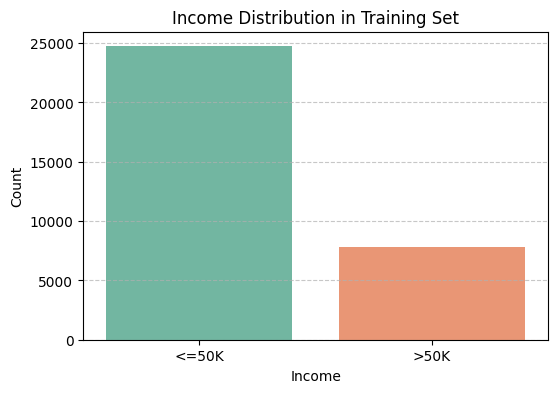

In [26]:
# Visualize the distribution of the target variable 'income'
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df_train, x='income', hue='income', palette='Set2', legend=False
)  # The hue parameter is used to suppress the warning
plt.title('Income Distribution in Training Set')
plt.xlabel('Income')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Exploring Education Level Distribution


Now, let's check the distribution of education levels in the dataset. This gives us insight into the average persona or demographic represented in the data

---
Answer the following questions:
- What is the most earned degree among participants?
- Is there a connection between education level and income?


In [27]:
# Find the most common education level
education_counts = df_train['education'].value_counts()
most_common_education = education_counts.idxmax()
print(
    f"Most earned degree is {most_common_education} with count {education_counts.max()} "
    f"and percentage {((education_counts.max() / len(df_train)) * 100):.2f}%"
)

Most earned degree is HS-grad with count 10501 and percentage 32.25%


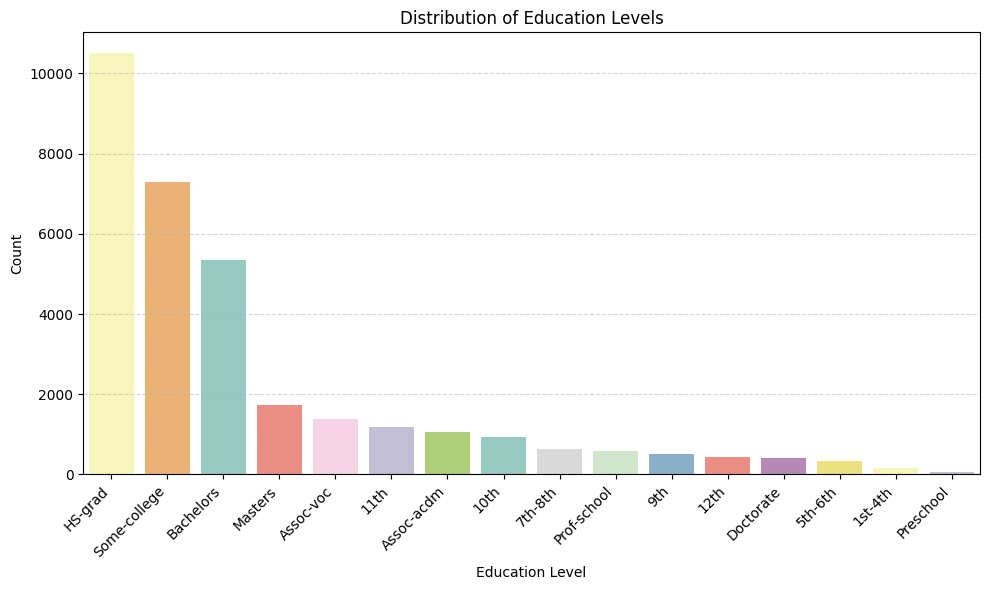

In [28]:
# Visualize the distribution of education levels
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_train,
    x='education',
    hue='education',  # The hue parameter is used to suppress the warning
    order=df_train['education'].value_counts().index,
    palette='Set3',
)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

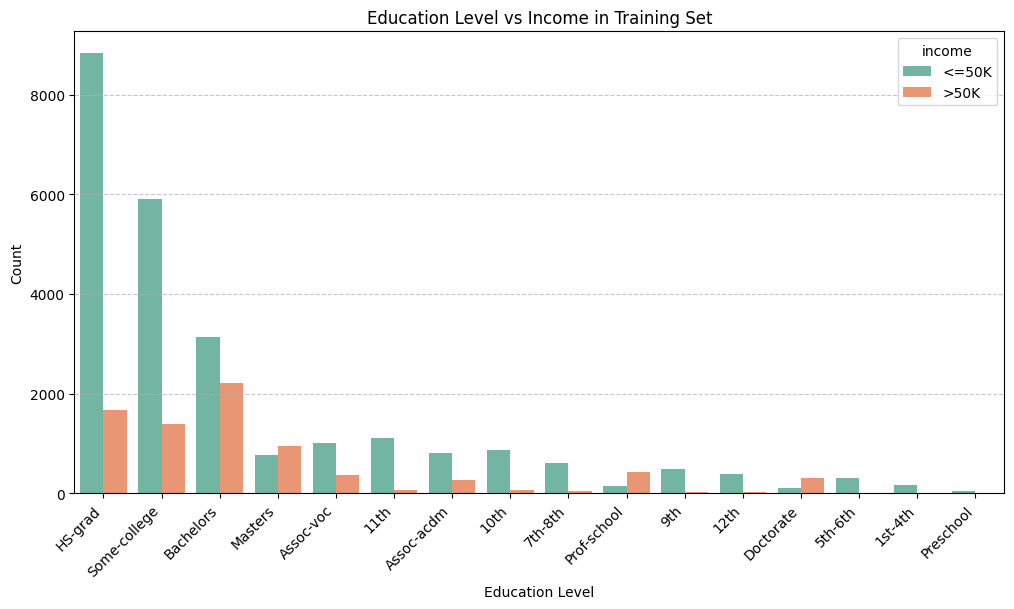

In [29]:
# Visualize the relationship between education level and income
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_train,
    x='education',
    hue='income',
    palette='Set2',
    order=df_train['education'].value_counts().index,
)
plt.title('Education Level vs Income in Training Set')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<span style="color: yellow;">Answers</span><br>
- Most earned degree is **HS-grad** with count 10501 and percentage 32.25%

- The bar chart strongly suggests a connection between education level and income in the training set. Here's what the data indicates:  
**Higher Education, Higher Income**  
As the education level increases, the number of individuals earning >50K generally tends to increase as well. For example, the number of people with Bachelor's, Master's, and Doctorate degrees earning >50K is noticeably higher compared to those with lower levels of education.
Lower Education, Lower Income: Conversely, the vast majority of individuals with lower education levels (like HS-grad, Some-college, 11th, 10th, 7th-8th, etc.) earn <=50K. The bars representing this income bracket are significantly taller for these education categories.
Exceptions Exist: While the trend is clear, there are some individuals with lower education levels who earn >50K and vice versa. However, these appear to be exceptions rather than the norm.

### Exploring the Relationship Between Nationality and Income

Exploring the income distribution across different nationalities reveals trends in earnings. This analysis can highlight which nationalities are more likely to earn higher income, providing insights into the potential socio-economic factors associated with nationality in the dataset

---

Tasks:
- Plot Nationality Distribution
- Compare Nationality vs. Income
- Identify Dominant Nationality with Highest Income Proportion

#### Task 1: Plot Nationality Distribution

Visualize the distribution of nationalities in the dataset to understand the representation of individuals from different countries. This will help in assessing the relative population of each nationality before comparing their income distributions

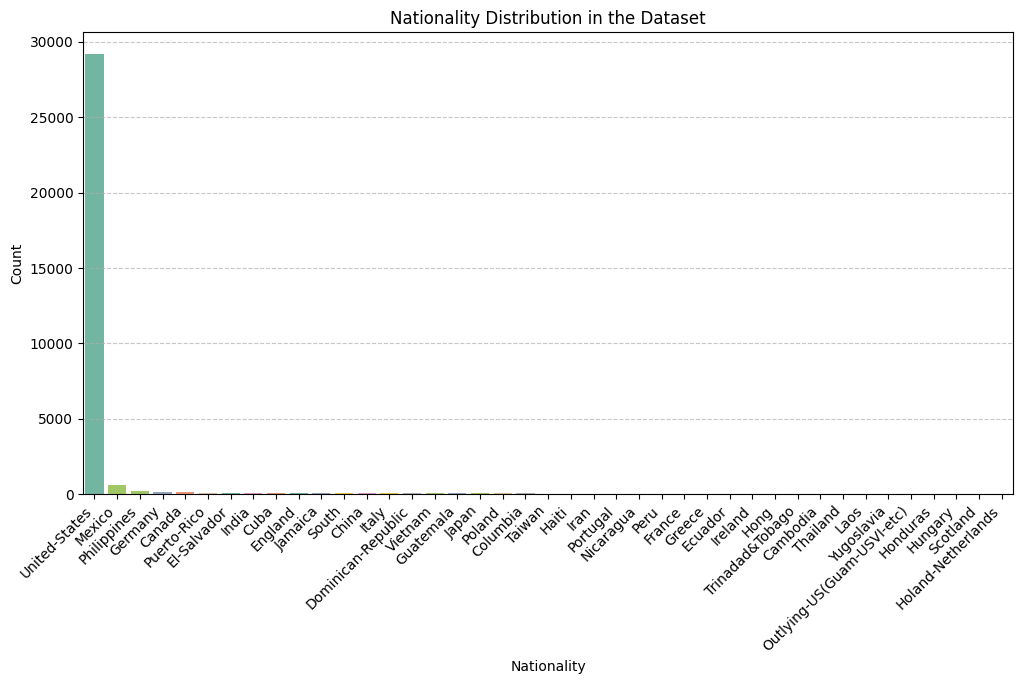

In [30]:
# Visualize the distribution of nationalities
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_train,
    x='native-country',
    hue='native-country',  # The hue parameter is used to suppress the warning
    palette='Set2',
    legend=False,
    order=df_train['native-country'].value_counts().index,
)
plt.title('Nationality Distribution in the Dataset')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [31]:
most_valued_country = df_train['native-country'].value_counts().idxmax()

most_valued_country_percentage = (
    df_train['native-country'].value_counts().max() / len(df_train)
) * 100

print(
    f"The most valued country is '{most_valued_country}' with a percentage of {most_valued_country_percentage:.2f}% among all entries."
)

The most valued country is 'United-States' with a percentage of 89.59% among all entries.


#### Task 2: Compare Nationality vs. Income

Compare the income levels (`<=50K` and `>50K`) across different nationalities. This analysis will show how income distribution varies by nationality, helping to identify trends in income disparity among different nationalities.

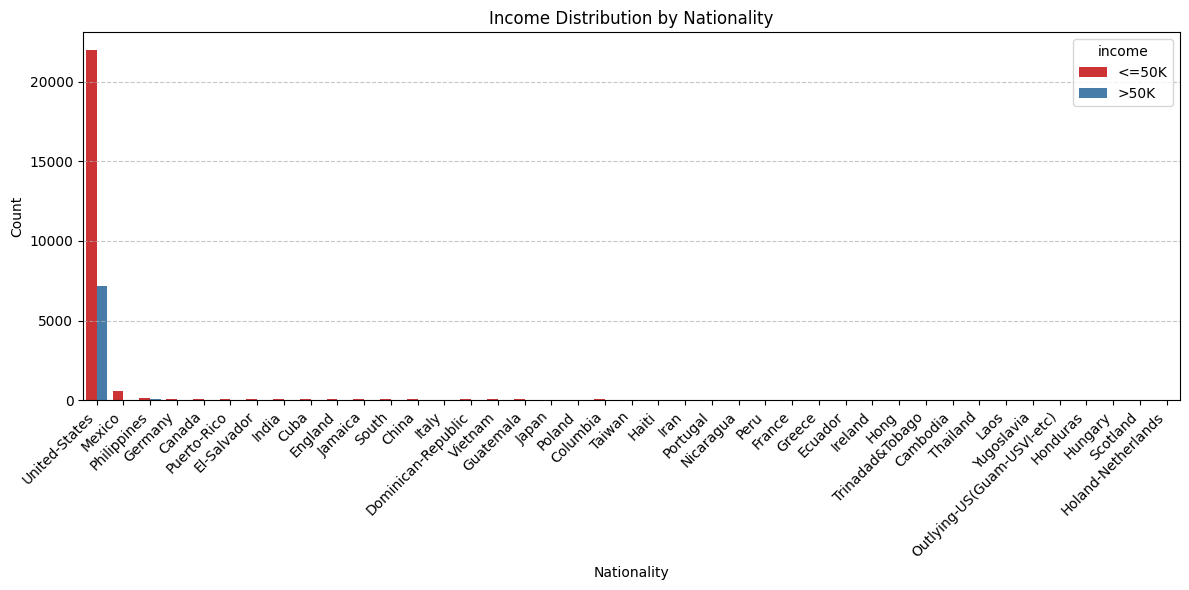

In [32]:
# Compare Nationality vs Income
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_train,
    x='native-country',
    hue='income',
    palette='Set1',
    order=df_train['native-country'].value_counts().index,
)
plt.title('Income Distribution by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Filter out the dominant nationality (the one with the highest population proportion) and perform the analysis on the remaining nationalities. This will help focus on the income distribution across nationalities excluding the one with the most significant representation, offering a more nuanced view of the income distribution among less-represented nationalities.

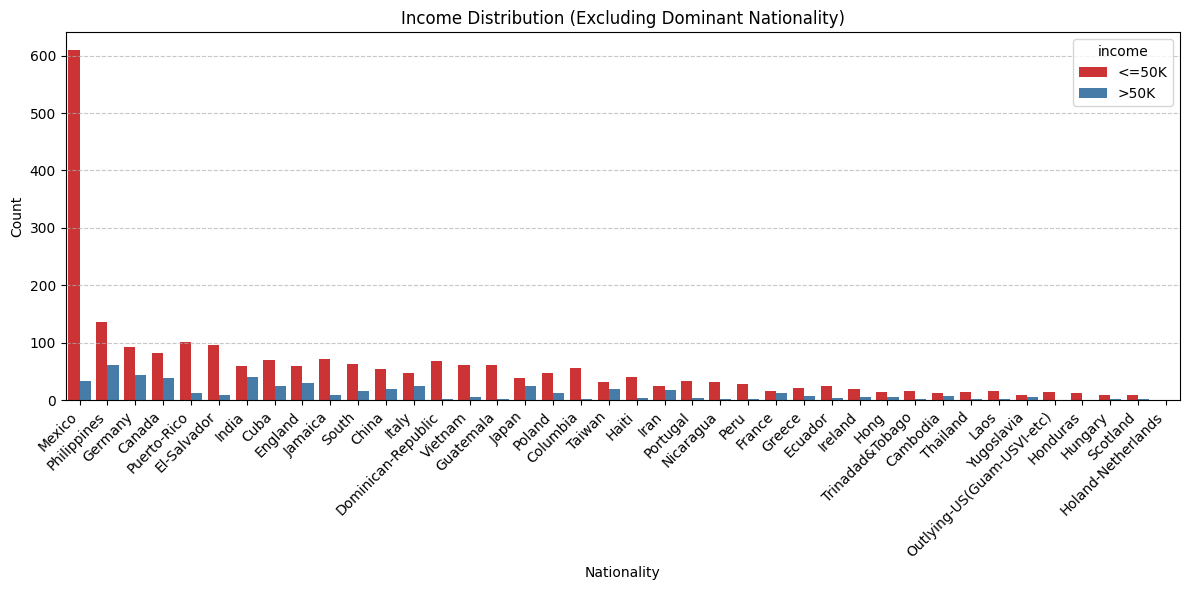

In [33]:
# Get the most frequent nationality
dominant_nationality = df_train['native-country'].value_counts().idxmax()

# Filter out the dominant nationality
df_filtered = df_train[df_train['native-country'] != dominant_nationality]

# Compare income distribution for the remaining nationalities
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_filtered,
    x='native-country',
    hue='income',
    palette='Set1',
    order=df_filtered['native-country'].value_counts().index,
)
plt.title('Income Distribution (Excluding Dominant Nationality)')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Answer Following Question:
- Which nationality is the second most populous in America, and what is their income distribution? What factors might explain these income patterns?

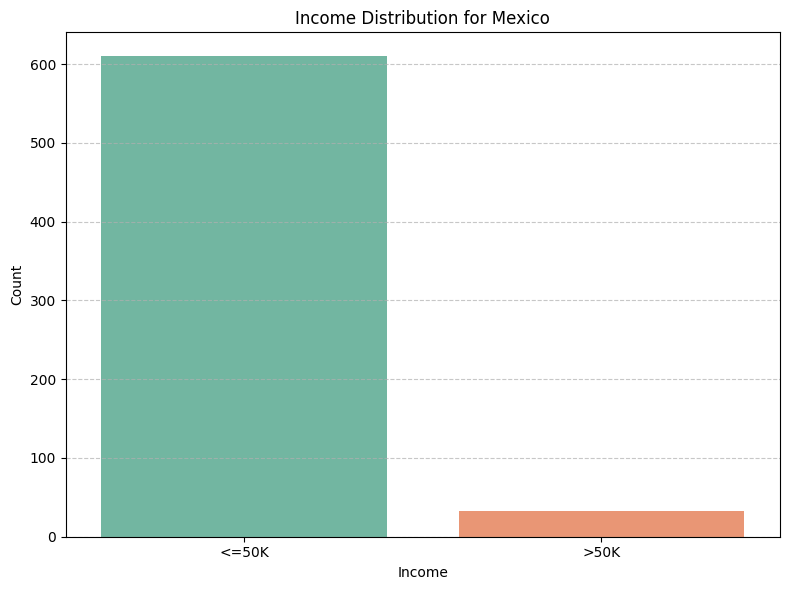

In [34]:
# Find the second most populous nationality
second_most_populous_nationality = df_train['native-country'].value_counts().index[1]

# Filter the dataset to show the income distribution for the second most populous nationality
df_second_most_populous = df_train[
    df_train['native-country'] == second_most_populous_nationality
]

plt.figure(figsize=(8, 6))
sns.countplot(
    data=df_second_most_populous,
    x='income',
    hue='income',  # The hue parameter is used to suppress the warning
    palette='Set2',
)
plt.title(f'Income Distribution for {second_most_populous_nationality}')
plt.xlabel('Income')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<span style="color: yellow;">Answer</span><br>
- The second most populous nationality in America is **Mexico**.  
- **Income Distribution**: The majority of individuals from Mexico earn `<=50K`, with very few earning `>50K`.  

**Factors Explaining These Patterns**:
1. **Education Levels**: Many individuals from Mexico in the dataset have lower education levels (e.g., 7th-8th grade or less), which is often correlated with lower income.
2. **Occupation Types**: A significant portion of individuals from Mexico work in lower-paying job sectors such as farming, fishing, or machine operation.
3. **Work Hours**: While some individuals work long hours, the type of work and pay scale may not lead to higher income.
4. **Socioeconomic Factors**: Immigration status, access to higher education, and job opportunities may also play a role in income disparities.

#### Task 3: Identify Dominant Nationality with Highest Income Proportion

Identify the nationality with the highest proportion of individuals earning more than 50K. This analysis helps highlight nationalities that are more likely to achieve higher earnings, providing insight into socio-economic patterns

---

Answer the folloiwng Question:
- What is the nationality with the highest proportion of individuals earning more than 50K? can you explian that?

In [35]:
# Filter the dataset to include only individuals earning more than 50K
df_high_income = df_train[df_train['income'] == '>50K']

# Group by 'Native-country' and calculate the proportion of people earning more than 50K
income_proportion = (
    df_high_income.groupby('native-country').size()
    / df_train.groupby('native-country').size()
)

# Find the nationality with the highest proportion
highest_proportion_nationality = income_proportion.idxmax()
highest_proportion_value = income_proportion.max()

print(
    f"The nationality with the highest proportion of individuals earning more than 50K is '{highest_proportion_nationality}' "
    f"with a proportion of {highest_proportion_value:.2%}."
)

The nationality with the highest proportion of individuals earning more than 50K is 'Iran' with a proportion of 41.86%.


In [36]:
print(df_high_income[df_high_income['native-country'] == 'Iran'].shape[0])

18


<span style="color: yellow;">Answer</span><br>

The nationality with the highest proportion of individuals earning more than 50K is **Iran** with a proportion of 41.86%.  
wait... ***what?!***  

**Explanation**  
This means that, among all individuals from Iran in the dataset, 41.86% have an income exceeding 50K. This is a notably high proportion compared to other nationalities in the dataset.

There could be a few reasons behind this result:

- Selection Bias in the Dataset: The UCI Adult dataset may not have a large or fully representative sample for every nationality. For smaller groups like Iranian nationals, even a modest number of high earners can skew the percentage.

- Highly Skilled Immigrants: It's possible that Iranian individuals in the dataset represent a specific demographic—such as skilled professionals, students with advanced degrees, or individuals working in high-paying sectors like technology or engineering.

- Educational Background: Immigrants from Iran in the U.S. may tend to have higher educational qualifications, which strongly correlate with higher incomes in this dataset.

- Small number of samples: Note that in this dataset only 18 Iranian individuals earn more than 50K.

### Exploring Hours per Week Distribution

#### Task 1: Plot hours-per-week distribution
Plot KDE and histogram of hours-per-week and determine typical work hours.


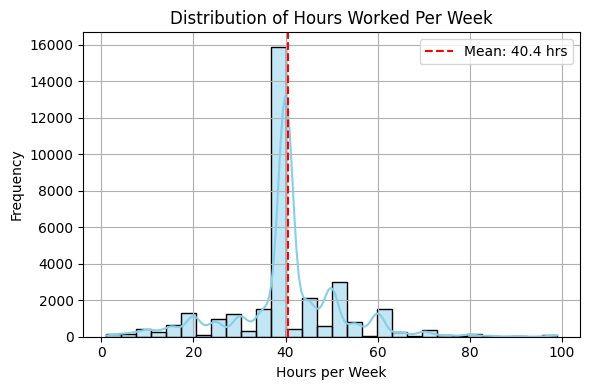

In [37]:
plt.figure(figsize=(6, 4))

# Histogram with KDE
sns.histplot(
    df_train['hours-per-week'], kde=True, bins=30, color='skyblue', edgecolor='black'
)

# Mean line
mean_hours = df_train['hours-per-week'].mean()
plt.axvline(
    mean_hours, color='red', linestyle='--', label=f'Mean: {mean_hours:.1f} hrs'
)

plt.title('Distribution of Hours Worked Per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Exploring the Relationship Between Sex and Income

#### Task 1: Plot and Compare Sex in the Dataset

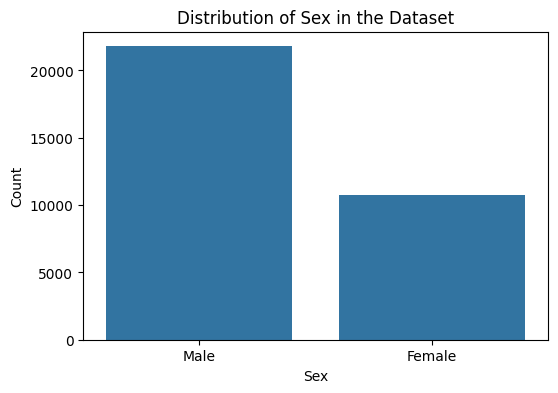

In [38]:
sex_counts = df_train['sex'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title('Distribution of Sex in the Dataset')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

#### Task 2: Plot and Compare Income by Gender

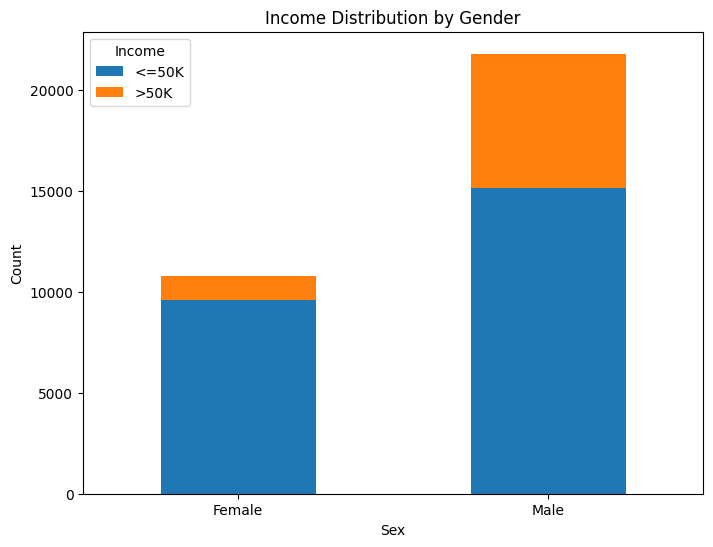

In [39]:
# Count the occurrences of income by gender
income_by_gender = df_train.groupby(['sex', 'income']).size().unstack()

income_by_gender.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Income Distribution by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

### Exploring Relationship between Age and Income

#### Task 1: Visualize the Distribution of Age vs. Income using violinplot

Answer the following questions:

- What patterns can be observed in the age group with income above 50k?

- Is it common for younger individuals to have an income above 50k?

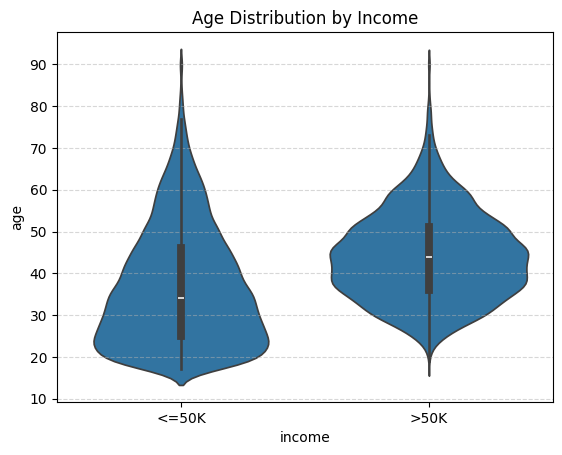

In [40]:
sns.violinplot(data=df_train, x='income', y='age')
plt.title('Age Distribution by Income')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

<span style="color: yellow;">Answer</span><br>

- What patterns can be observed in the age group with income above 50K?

Individuals earning more than 50K tend to be older. The density of high-income earners starts increasing around age 30, peaks between 35–50 years, and gradually decreases after that. This suggests that age, likely correlated with work experience and career progression, has a strong influence on income.

- Is it common for younger individuals to have an income above 50K?

No, it is relatively uncommon. The violin plot typically shows that individuals under 30 rarely earn more than 50K. Most young earners fall into the ≤50K category, likely because they are early in their careers or still pursuing education.

#### Task 2: Visualize and Compare the Age Distribution Across Different Races using a Violin Plot

Answer the Following question:
- Which race has the highest concentration of middle-aged individuals?

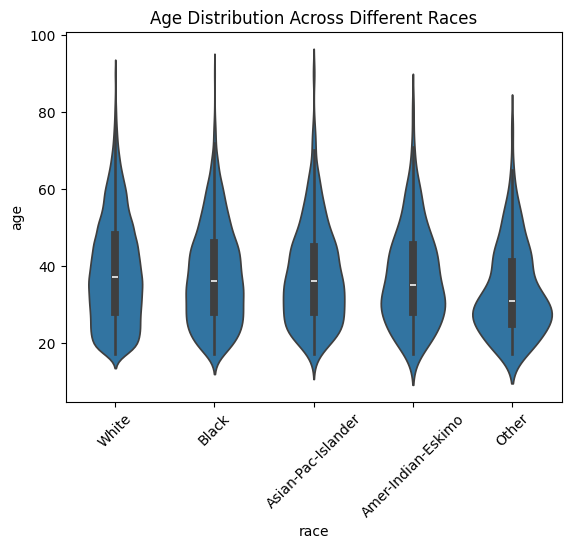

In [41]:
sns.violinplot(data=df_train, x='race', y='age')
plt.title('Age Distribution Across Different Races')
plt.xticks(rotation=45)
plt.show()

<span style="color: yellow;">Answer</span><br>
- Which race has the highest concentration of middle-aged individuals?

Based on the violin plot, concentration of middle-aged people is about the same among different races except Other. Other is significantly lower. but being more precise:

The race with the highest concentration of middle-aged individuals is 'Asian-Pac-Islander' with 45.33% of its members in the 35–55 age range.

### Exploring Relationship between Race and Income

#### Task 1: Visualize the Income Distribution Across Different Races

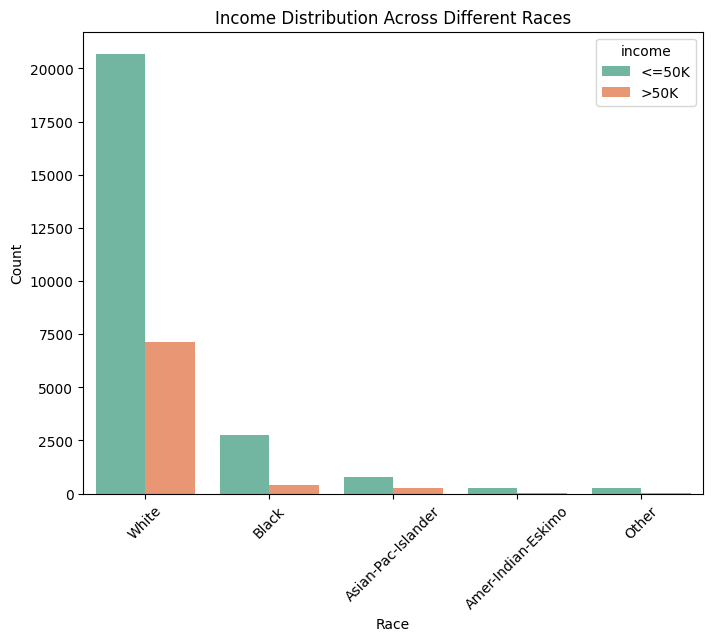

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='race', hue='income', palette='Set2')

plt.title('Income Distribution Across Different Races')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

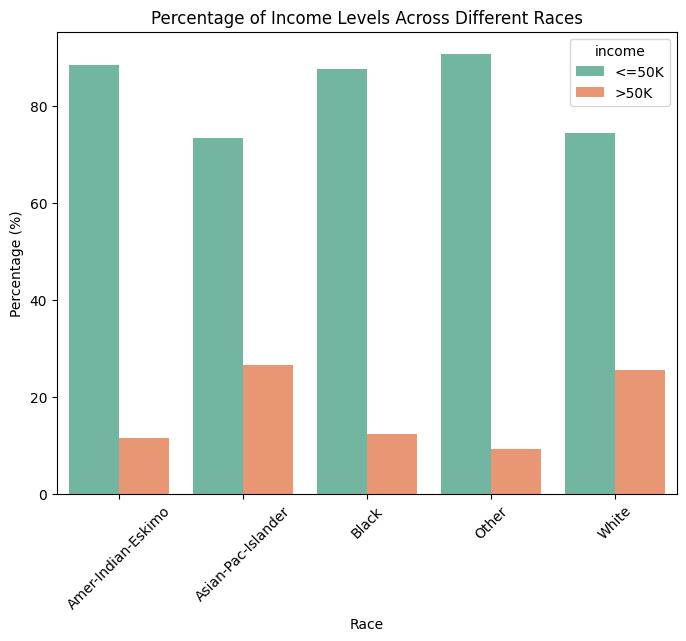

In [43]:
race_income_counts = (
    df_train.groupby(['race', 'income']).size().reset_index(name='count')
)
race_totals = race_income_counts.groupby('race')['count'].transform('sum')
race_income_counts['percentage'] = race_income_counts['count'] / race_totals * 100

plt.figure(figsize=(8, 6))
sns.barplot(
    data=race_income_counts, x='race', y='percentage', hue='income', palette='Set2'
)

plt.title('Percentage of Income Levels Across Different Races')
plt.ylabel('Percentage (%)')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.show()

#### Task 2: Plot and Sort Races Based on the Highest Proportion of High-Income Individuals Across Races

Answer the following question:

- Which race has the highest proportion of high-income individuals?

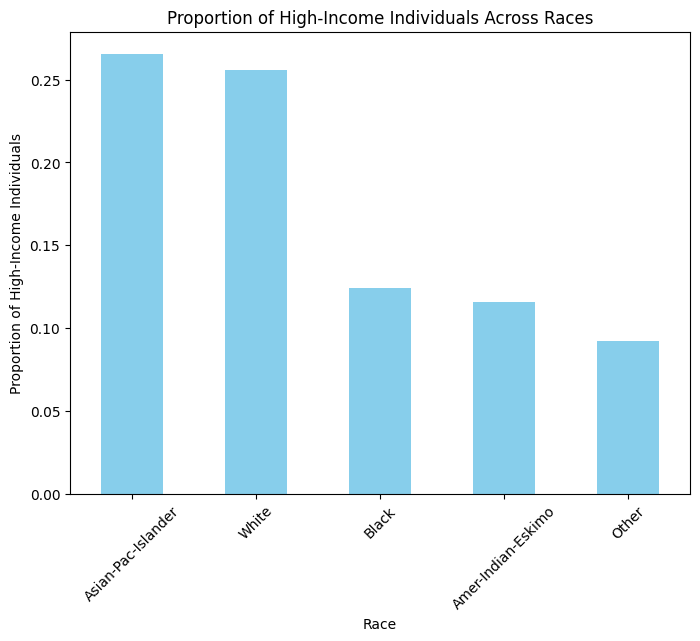

The race with the highest proportion of high-income individuals is 'Asian-Pac-Islander' with a proportion of 26.56%.


In [44]:
total_by_race = df_train['race'].value_counts()

high_income_by_race = df_train[df_train['income'] == '>50K']['race'].value_counts()

# Compute proportion of high-income individuals per race
high_income_proportion = (high_income_by_race / total_by_race).sort_values(
    ascending=False
)

plt.figure(figsize=(8, 6))
high_income_proportion.plot(kind='bar', color='skyblue')

plt.title('Proportion of High-Income Individuals Across Races')
plt.ylabel('Proportion of High-Income Individuals')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.show()

highest_proportion_race = high_income_proportion.idxmax()
highest_proportion_value = high_income_proportion.max()

print(
    f"The race with the highest proportion of high-income individuals is '{highest_proportion_race}' with a proportion of {highest_proportion_value:.2%}."
)

<span style="color: yellow;">Answer</span><br>
The race with the highest proportion of high-income individuals is ***Asian-Pac-Islander*** with a proportion of 26.56%.

### Exploring the Relationship Between Marital Status and Income


- Similar to the previous sections, use various plots to explore and identify patterns between the `Relationship`, `Marital Status`, and `Income` features. You are free to choose any types of plots that you find suitable for the analysis.

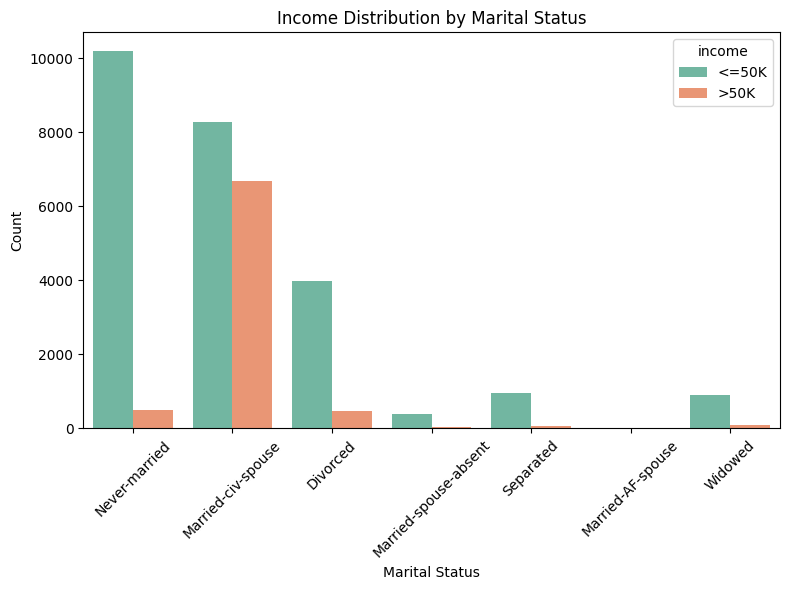

In [45]:
# Plotting the income distribution by marital status
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='marital-status', hue='income', palette='Set2')

plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

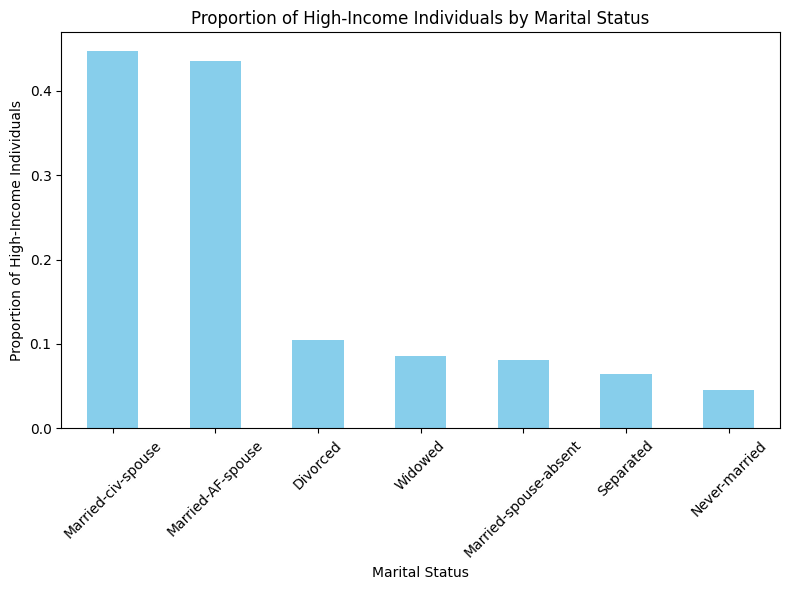

The marital status with the highest proportion of high-income individuals is 'Married-civ-spouse' with a proportion of 44.68%.


In [46]:
total_by_marital_status = df_train['marital-status'].value_counts()

high_income_by_marital_status = df_train[df_train['income'] == '>50K'][
    'marital-status'
].value_counts()

# Compute the proportion of high-income individuals per marital status
high_income_marital_proportion = (
    high_income_by_marital_status / total_by_marital_status
).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
high_income_marital_proportion.plot(kind='bar', color='skyblue')

plt.title('Proportion of High-Income Individuals by Marital Status')
plt.ylabel('Proportion of High-Income Individuals')
plt.xlabel('Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

highest_proportion_marital_status = high_income_marital_proportion.idxmax()
highest_proportion_marital_value = high_income_marital_proportion.max()

print(
    f"The marital status with the highest proportion of high-income individuals is '{highest_proportion_marital_status}' with a proportion of {highest_proportion_marital_value:.2%}."
)

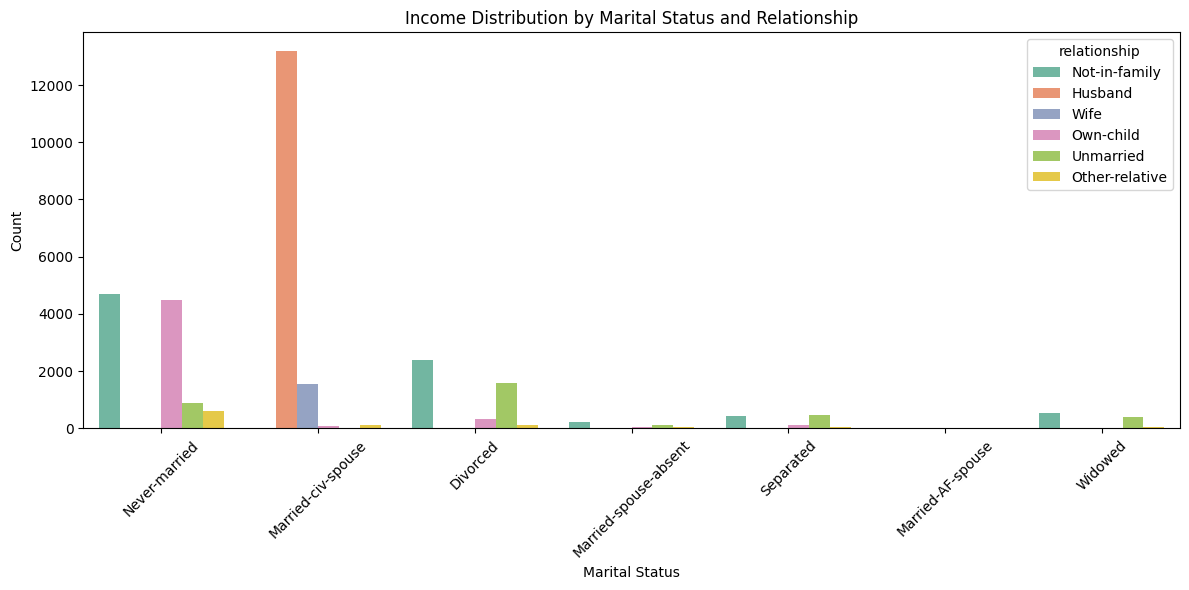

In [47]:
# Plotting the income distribution by both marital status and relationship
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='marital-status', hue='relationship', palette='Set2')

plt.title('Income Distribution by Marital Status and Relationship')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Exploring the Relationship Between Occupation, Workclass and Income

- Similar to the previous sections, use various plots to explore and identify patterns between the `Occupation`, `Workclass`, and `Income` features. You are free to choose any types of plots that you find suitable for the analysis.

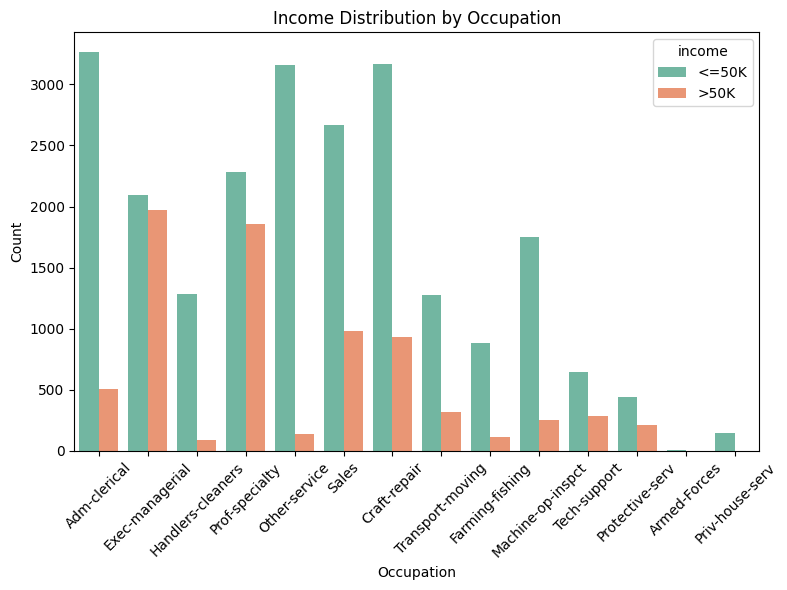

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='occupation', hue='income', palette='Set2')
plt.title('Income Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

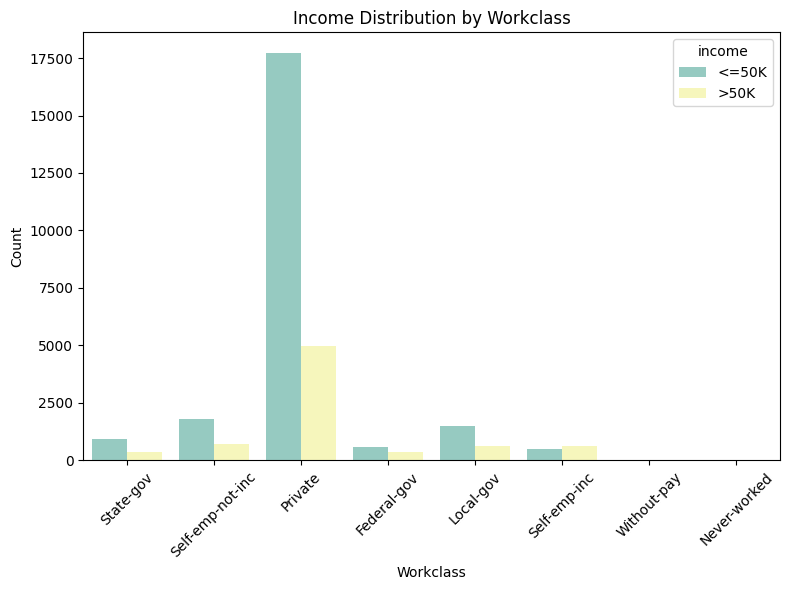

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='workclass', hue='income', palette='Set3')
plt.title('Income Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

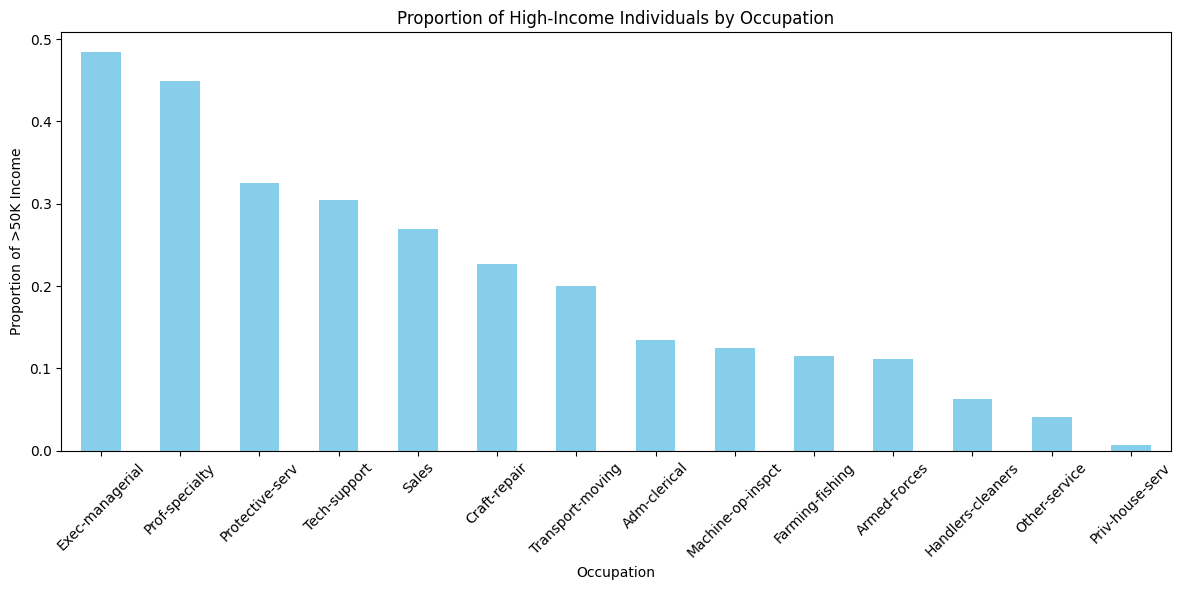

In [50]:
# Total and high-income counts per occupation
occupation_total = df_train['occupation'].value_counts()
occupation_high_income = df_train[df_train['income'] == '>50K'][
    'occupation'
].value_counts()

# Proportions
occupation_income_ratio = (occupation_high_income / occupation_total).sort_values(
    ascending=False
)

plt.figure(figsize=(12, 6))
occupation_income_ratio.plot(kind='bar', color='skyblue')
plt.title('Proportion of High-Income Individuals by Occupation')
plt.ylabel('Proportion of >50K Income')
plt.xlabel('Occupation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

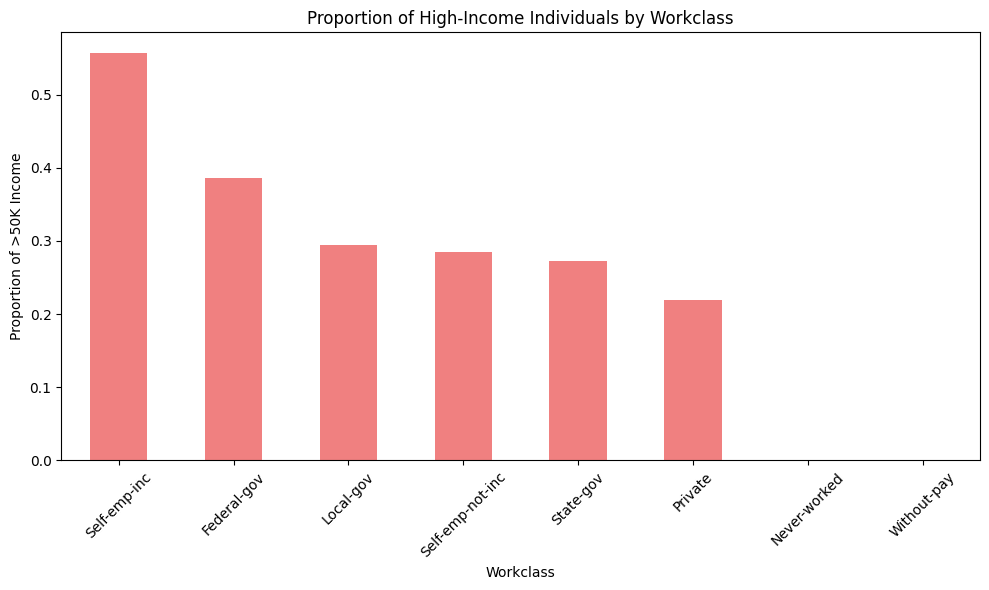

In [51]:
# Total and high-income counts per workclass
workclass_total = df_train['workclass'].value_counts()
workclass_high_income = df_train[df_train['income'] == '>50K'][
    'workclass'
].value_counts()

# Proportions
workclass_income_ratio = (workclass_high_income / workclass_total).sort_values(
    ascending=False
)

plt.figure(figsize=(10, 6))
workclass_income_ratio.plot(kind='bar', color='lightcoral')
plt.title('Proportion of High-Income Individuals by Workclass')
plt.ylabel('Proportion of >50K Income')
plt.xlabel('Workclass')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Describing the Final Persona

Based on the insights from the previous sections, describe a persona that has a high likelihood of earning above 50k in a year. Consider factors such as age, race, marital status, and relationship status to outline the characteristics of this individual.

<span style="color: yellow;">Answer</span><br>

Based on the patterns observed in the dataset, an individual with a high likelihood of earning above 50K per year typically has the following characteristics:

- **Age**: Between 35 and 50 years old. This age group has the highest density of high-income earners.
- **Gender**: Male. Men are more represented among high-income individuals than women.
- **Education**: Holds at least a Bachelor's, Master's, or Doctorate degree. Higher education strongly correlates with higher income.
- **Occupation**: Works in an executive-managerial or professional specialty role, which are the occupations with the highest proportions of >50K earners.
- **Workclass**: Either self-employed (incorporated) or working for the federal government. These work classes have the highest income proportions.
- **Marital Status**: Married-civ-spouse, which has the highest proportion of high-income individuals.
- **Relationship**: Often listed as Husband, which aligns with the gender and marital patterns observed.
- **Race**: Most likely Asian-Pac-Islander, which had the highest proportion of high-income earners among races, although differences were small across most races.
- **Nationality**: Most likely from the United States due to population share, but individuals from Iran had the highest proportion of high-income earners, possibly due to education or professional background (or even maybe biased sampling).

This profile reflects the combination of factors that most commonly appear in individuals earning more than 50K in this dataset.


# Step 4: Handle Missing Values


There are several ways to deal with missing values. Below are some common strategies:

### Missing Value Strategies

#### For **numerical features**:
- `Drop rows` that have missing values
- `Fill with mean`
- `Fill with median`
- `Use KNN or regression imputation`

#### For **categorical features**:
- `Drop rows` with missing categories
- `Fill with the most frequent value` (mode)
- `Fill with a new category` like "Unknown"
- `Use model-based imputation`

---

 **Task**:  
1. **Which method(s) do you think are best for this dataset?**  
2. **Why?** Consider the number of missing values, the type of features, and how it may affect modeling.  
3. Implement your chosen strategy below.


In [52]:
# Fill missing categorical values with 'Unknown'
categorical_columns = ['workclass', 'occupation', 'native-country']
df_train[categorical_columns] = df_train[categorical_columns].fillna('Unknown')
df_train.isnull().sum()

categorical_columns = ['workclass', 'occupation', 'native-country']
df_test[categorical_columns] = df_test[categorical_columns].fillna('Unknown')
df_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

<span style="color: yellow;">Answer</span><br>

Best method: Filling missing categorical values with a new category like "Unknown".

Why:

The missing data is limited to a few categorical features: 'workclass', 'occupation', and 'native-country'.

Dropping rows would remove too much potentially useful data.

Filling with "Unknown" preserves all rows and signals to the model that the value was missing, allowing it to learn any patterns from that.

This approach is simple, effective, and widely used for categorical features in classification tasks like this.

# Step 7: Identify Categorical Features


Most machine learning models require numerical input. We must convert **categorical columns** to numbers.

There are several encoding methods. Each method has strengths and weaknesses depending on the dataset and the type of model you're using.

---

### Common Encoding Techniques

1. **One-Hot Encoding**  
2. **Label Encoding**  
3. **Frequency Encoding**  
4. **Target / Mean Encoding**  
5. **Binary Encoding**  
6. **Hash Encoding**

---

 **Your Task**:

1. Research the methods above (or based on what we've discussed in class).
2. For each method, briefly write down:
   - When you might use it
   - Its potential pros and cons
3. Choose the one(s) you think work best for this dataset.
4. Explain **why** your choice is appropriate.
5. Implement your encoding method(s) in the code cell below.




In [ ]:
# One-Hot Encoding for workclass, occupation, marital-status, relationship
# (possible tuning) Frequency encoding for workclass, occupation

df_encoded = df_train.copy()

categorical_cols = [
    'workclass',
    'marital-status',
    'relationship',
    'race',
    'sex',
    'income',
]
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

df_test_encoded = df_test.copy()
df_test_encoded = pd.get_dummies(
    df_test_encoded, columns=categorical_cols, drop_first=True
)

In [ ]:
import category_encoders as ce

# Binary encoding for native-country and occupation
encoder = ce.BinaryEncoder(cols=['native-country', 'occupation'])
df_encoded = encoder.fit_transform(df_encoded)

df_test_encoded = encoder.transform(df_test_encoded)

In [ ]:
# Label Encoding for education

# Define the order from lowest to highest education
education_order = {
    'Preschool': 0,
    '1st-4th': 1,
    '5th-6th': 2,
    '7th-8th': 3,
    '9th': 4,
    '10th': 5,
    '11th': 6,
    '12th': 7,
    'HS-grad': 8,
    'Some-college': 9,
    'Assoc-voc': 10,
    'Assoc-acdm': 11,
    'Bachelors': 12,
    'Masters': 13,
    'Prof-school': 14,
    'Doctorate': 15,
}

# Apply the mapping
df_encoded['education_encoded'] = df_encoded['education'].map(education_order)
df_encoded.drop(columns='education', inplace=True)
df_test_encoded['education_encoded'] = df_test_encoded['education'].map(education_order)
df_test_encoded.drop(columns='education', inplace=True)
df_encoded

,age,fnlwgt,education-num,occupation_0,occupation_1,occupation_2,occupation_3,capital-gain,capital-loss,hours-per-week,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_>50K,education_encoded
0,39,77516,13,0,0,0,1,2174,0,40,...,False,False,False,False,False,False,True,True,False,12
1,50,83311,13,0,0,1,0,0,0,13,...,False,False,False,False,False,False,True,True,False,12
2,38,215646,9,0,0,1,1,0,0,40,...,False,False,False,False,False,False,True,True,False,8
3,53,234721,7,0,0,1,1,0,0,40,...,False,False,False,False,True,False,False,True,False,6
4,28,338409,13,0,1,0,0,0,0,40,...,False,False,True,False,True,False,False,False,False,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,1,0,1,1,0,0,38,...,False,False,True,False,False,False,True,False,False,11
32557,40,154374,9,1,0,1,0,0,0,40,...,False,False,False,False,False,False,True,True,True,8
32558,58,151910,9,0,0,0,1,0,0,40,...,False,True,False,False,False,False,True,False,False,8
32559,22,201490,9,0,0,0,1,0,0,20,...,True,False,False,False,False,False,True,True,False,8


<span style="color: yellow;">Answer</span><br>

### 1. **One-Hot Encoding**

* **When to use**:
  We use One-Hot Encoding when we have categorical features with no inherent order. This is commonly used with features like color, product type, country, etc.

* **Pros**:

  * Simple to implement.
  * Does not impose any ordinal relationship between categories.
  * Works well with tree-based models and linear models.

* **Cons**:

  * Increases dimensionality: If we have many categories (like 1,000 unique cities), it can create a large sparse matrix, which can be computationally expensive.
  * May cause issues with distance-based models (like KNN), as each category becomes a separate dimension.

### 2. **Label Encoding**

* **When to use**:
  Label Encoding works well when the categorical feature has an ordinal relationship (like education level: "High School" < "College" < "Masters" < "PhD"). It’s also useful for tree-based models like decision trees and random forests.

* **Pros**:

  * Efficient in terms of memory because it doesn't increase dimensionality. Categories are converted into integer values.
  * Can work well with tree-based models, which don't rely on the ordinal relationship between encoded values.

* **Cons**:

  * Assumes an ordinal relationship: If you use label encoding on nominal data (like country, color), it can mislead the model into thinking there's a ranking or order where there is none.
  * Not suitable for linear models as they will interpret the numerical values as continuous, which can distort the results.

### 3. **Frequency Encoding**

* **When to use**:
  This is useful when the frequency of a category carries useful information, or when categories appear infrequently but have a significant presence in the dataset. It's good for high-cardinality features (many unique categories).

* **Pros**:

  * Reduces dimensionality: Unlike one-hot encoding, it doesn’t create many columns.
  * Efficient and works well with high-cardinality categorical variables (like user IDs, product IDs).

* **Cons**:

  * It may fail to capture contextual relationships between categories, since it only considers their occurrence frequency.
  * Can be problematic if there’s a lot of variance in frequencies, as rare categories might be undervalued.

### 4. **Target / Mean Encoding**

* **When to use**:
  This method is used when the categorical feature has a strong relationship with the target variable. For example, in classification tasks, if some categories of a feature are more likely to result in a positive outcome, this method is useful.

* **Pros**:

  * Can provide predictive power since it directly incorporates the relationship with the target variable.
  * Works well with linear models and models that assume a numeric relationship with the target.

* **Cons**:

  * Overfitting: Target encoding can easily lead to overfitting, especially if the feature has many categories and little data.
  * It's important to regularize or use cross-validation to avoid leaking information from the target variable into the features.
  * It requires a careful process to handle new categories in the test set.

### 5. **Binary Encoding**

* **When to use**:
  This method is best used for categorical features with high cardinality (many unique categories) but when you still want to keep some information about the categories. It is more efficient than one-hot encoding in terms of dimensionality.

* **Pros**:

  * Reduces dimensionality compared to one-hot encoding.
  * Can be more memory-efficient for high-cardinality features.

* **Cons**:

  * The binary representation may still introduce unnecessary correlations between categories.
  * Not ideal if the model is sensitive to order or direction.

### 6. **Hash Encoding**

* **When to use**:
  Use Hash Encoding when you have extremely high cardinality (e.g., thousands or millions of unique categories). It’s particularly useful for feature engineering in models with many categorical variables.

* **Pros**:

  * Efficient in terms of both memory and computation.
  * Can handle very high cardinality without increasing the feature space dramatically.

* **Cons**:

  * Collisions Hash encoding can lead to hash collisions, where different categories are hashed to the same value, causing loss of information.
  * Interpretability: It’s harder to understand the meaning behind the encoded values, making model interpretation more difficult.


### My chosen method reasonings:
**One-Hot Encoding for workclass, marital-status, race, sex, income and relationship**\
These features are nominal (unordered) categorical variables with a manageable number of distinct values. One-hot encoding is appropriate because it:
Prevents the model from assuming any ordinal relationship between categories,
Allows algorithms to independently assess the contribution of each category,
Works well with a wide range of models, including logistic regression and neural networks.

**Binary Encoding for native-country and occupation**\
Since native-country and occupation have a lot of unique values, binary encoding is the most efficient and interpretable method. It avoids unnecessary dimensionality that one-hot encoding would introduce for a binary feature (and reduced unnecessary dimensionality for columns that have a lot of unique values).

**Label Encoding for education**\
Education can be considered an ordinal feature, as its categories represent increasing levels of education (e.g., Preschool < HS-grad < Bachelors < Masters, etc.). Label encoding retains this natural order and provides the model with a numerical sense of progression, which can be informative for certain algorithms, especially tree-based models.

**Frequency Encoding for workclass and occupation (Alternative for Tuning)**\
As a potential alternative during model tuning, frequency encoding could be used for workclass and occupation. This method replaces categories with their relative frequency in the dataset, which may help:
Reduce dimensionality compared to one-hot encoding,
Embed useful statistical patterns if some categories are significantly more common than others.

However, this approach may introduce biases or lose categorical distinctions, so it should be evaluated during experimentation.
<hr>

# Step 8: Correlation Matrix (Numerical Features)

Correlation helps us understand how strongly features are related to each other.  
This is useful for:
- Detecting multicollinearity (when features are too similar)
- Spotting features that might be predictive of the target variable

We'll compute the correlation matrix and visualize it with a heatmap.


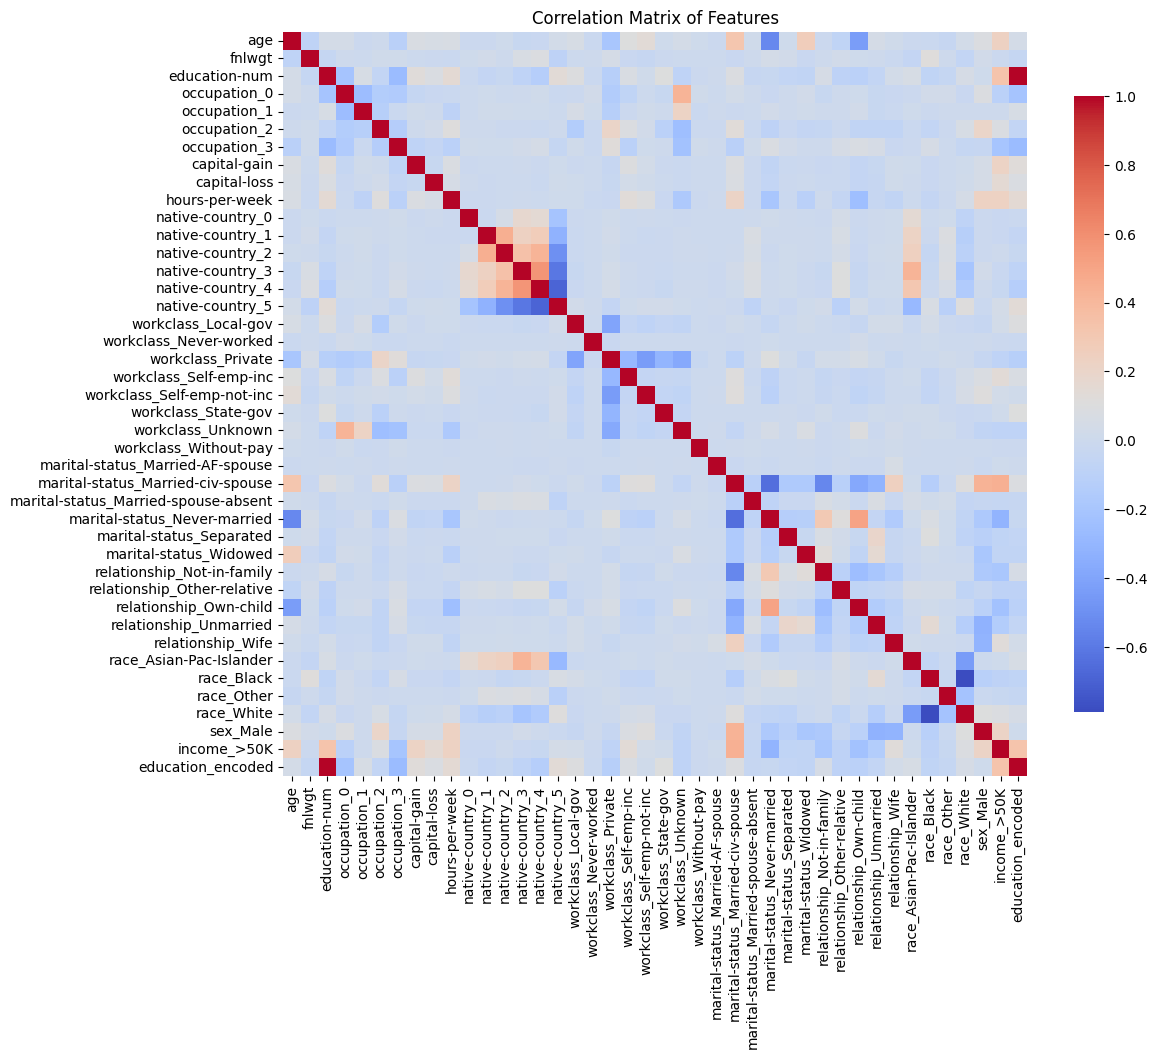

In [ ]:
# Correlation matrix and heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    df_encoded.corr(),
    annot=False,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": 0.8},
)
plt.title('Correlation Matrix of Features')
plt.show()

In [71]:
display(df_encoded.corr())

,age,fnlwgt,education-num,occupation_0,occupation_1,occupation_2,occupation_3,capital-gain,capital-loss,hours-per-week,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_>50K,education_encoded
age,1.000000,-0.076646,0.036527,0.035778,-0.007754,0.001675,-0.104380,0.077674,0.057775,0.068756,...,-0.432918,0.043188,0.020854,-0.011111,-0.019434,-0.034415,0.033412,0.088832,0.234037,0.036527
fnlwgt,-0.076646,1.000000,-0.043195,0.001322,-0.000528,0.015426,0.015558,0.000432,-0.010252,-0.018768,...,0.013818,0.004400,-0.016897,-0.051323,0.118009,0.006376,-0.056896,0.026858,-0.009463,-0.043195
education-num,0.036527,-0.043195,1.000000,-0.213836,0.056799,-0.059972,-0.269004,0.122630,0.079923,0.148123,...,-0.099213,-0.058637,0.033427,0.062091,-0.075272,-0.044133,0.051353,0.012280,0.335154,1.000000
occupation_0,0.035778,0.001322,-0.213836,1.000000,-0.259787,-0.141052,-0.157273,-0.043525,-0.024253,-0.013267,...,0.014111,-0.028497,-0.026297,-0.011983,0.028634,0.023387,-0.026756,0.089117,-0.098682,-0.213836
occupation_1,-0.007754,-0.000528,0.056799,-0.259787,1.000000,-0.124137,-0.020128,0.014999,0.003303,-0.085909,...,0.028460,-0.027763,-0.018679,0.009103,-0.011952,0.004463,0.004352,0.005428,0.002511,0.056799
occupation_2,0.001675,0.015426,-0.059972,-0.141052,-0.124137,1.000000,-0.132629,0.006830,0.022551,0.112314,...,-0.064695,-0.065533,-0.066169,-0.020011,-0.055535,-0.009761,0.060479,0.200526,0.083651,-0.059972
occupation_3,-0.104380,0.015558,-0.269004,-0.157273,-0.020128,-0.132629,1.000000,-0.076758,-0.052399,-0.097094,...,0.077547,0.052345,-0.022298,-0.010066,0.055062,0.000707,-0.042228,-0.040166,-0.202138,-0.269004
capital-gain,0.077674,0.000432,0.122630,-0.043525,0.014999,0.006830,-0.076758,1.000000,-0.031615,0.078409,...,-0.053601,-0.029004,0.017730,0.009851,-0.020631,-0.001774,0.014429,0.048480,0.223329,0.122630
capital-loss,0.057775,-0.010252,0.079923,-0.024253,0.003303,0.022551,-0.052399,-0.031615,1.000000,0.054256,...,-0.050922,-0.039136,0.017138,0.004469,-0.021762,-0.005964,0.021044,0.045567,0.150526,0.079923
hours-per-week,0.068756,-0.018768,0.148123,-0.013267,-0.085909,0.112314,-0.097094,0.078409,0.054256,1.000000,...,-0.249254,-0.037182,-0.065140,-0.004564,-0.053153,-0.007188,0.049345,0.229309,0.229689,0.148123


# Step 9: Feature Scaling

Before addressing class imbalance, we apply feature scaling to the numerical features.
Scaling ensures that features contribute equally to the model training process and improves convergence for many machine learning algorithms.

### Scaling Methods:

#### 1. StandardScaler
- standardizes features by removing the mean and scaling to unit variance.

#### 2. MinMaxScaler
- scales features to a given range (usually [0, 1]).

#### 3. MaxAbsScaler

- scales features by their maximum absolute value.

#### 4. RobustScaler
- scales features using statistics that are robust to outliers.

#### 5. Normalizer
- scales individual samples to have unit norm.

---
 **Your Task**:
1. Choose a scaling method and explain your reasoning.
2. Implement your chosen method below.



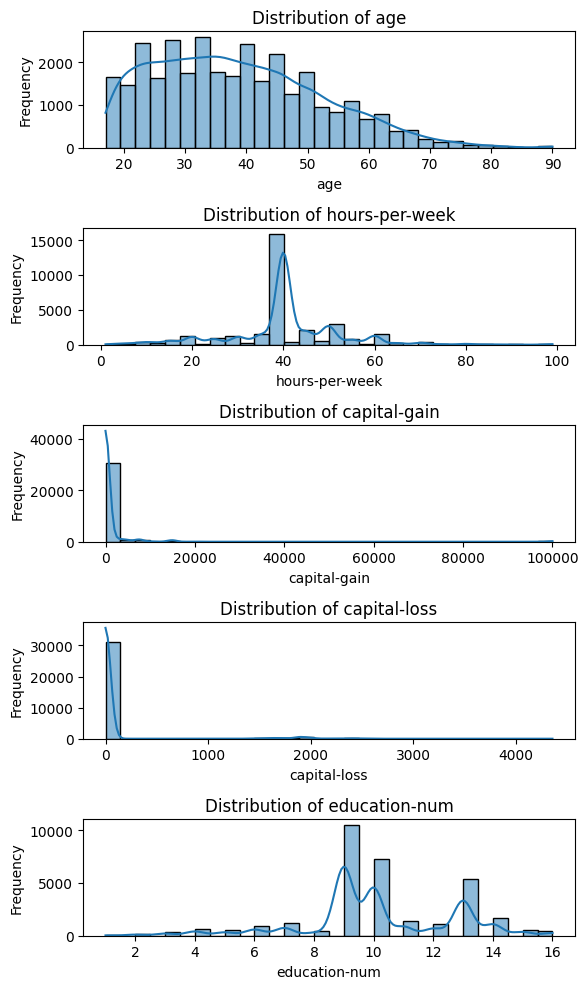

In [ ]:
# First we see get an intuitive feel for the distribution

continuous_cols = [
    'age',
    'hours-per-week',
    'capital-gain',
    'capital-loss',
    'education-num',
]

# Create subplots for histograms
fig, axes = plt.subplots(nrows=len(continuous_cols), ncols=1, figsize=(6, 10))

for ax, col in zip(axes, continuous_cols):
    sns.histplot(df_encoded[col], kde=True, bins=30, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Use RobustScaler to scale the continuous features
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
continuous_cols = [
    'age',
    'hours-per-week',
    'capital-gain',
    'capital-loss',
    'education-num',
]

df_encoded[continuous_cols] = scaler.fit_transform(df_encoded[continuous_cols])
df_test_encoded[continuous_cols] = scaler.transform(df_test_encoded[continuous_cols])

<span style="color: yellow;">Answer</span><br>

So according to what we see, we are faced with skewed data therefore the best choice for scaling is RobustScaler; why?
Instead of using mean and standard deviation, RobustScaler uses median (the middle value) and IQR (interquartile range, The range between the 25th and 75th percentiles).
These statistics ignore extreme values, so scaling remains stable and meaningful even when outliers exist.


# Step 10: Dealing with Class Imbalance

### Identifying Class Imbalance
In classification problems, it is common to have **imbalanced** classes, where one class has far more examples than the other. This can negatively impact model performance since many standard algorithms assume a balanced dataset.

**Question**: Where do we use resampling?

Our target variable `income` is imbalanced — most people earn `<=50K`.

This imbalance can cause models to:
- Be biased toward the majority class
- Fail to learn patterns of the minority class

### Resampling Techniques

#### 1. Random OverSampling
- Duplicate samples from the minority class

#### 2. Random UnderSampling
- Remove samples from the majority class

#### 3. SMOTE (Synthetic Minority Over-sampling Technique)
- Generate new synthetic samples from the minority class

---

 **Your Task**:
1. Inspect the class distribution.
2. Choose a resampling strategy and explain your reasoning.
3. Implement your strategy below.


In [74]:
# Let's see the class distribution
df_encoded['income_>50K'].value_counts(normalize=True)

income_>50K
False    0.75919
True     0.24081
Name: proportion, dtype: float64

In [ ]:
# Implementing SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(
    df_encoded.drop(columns=['income_>50K']), df_encoded['income_>50K']
)

# Split the test set into features and labels
X_test_encoded = df_test_encoded.drop(columns=['income_>50K'])
y_test_encoded = df_test_encoded['income_>50K']

In [77]:
# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts(normalize=True))

Class distribution after SMOTE:
income_>50K
False    0.5
True     0.5
Name: proportion, dtype: float64


<span style="color: yellow;">Answer</span><br>

SMOTE (Synthetic Minority Over-sampling Technique) is often the best choice in situations like this:
<ul>
<li>Instead of simply duplicating minority samples (which can lead to overfitting), SMOTE generates synthetic examples based on the nearest neighbors, increasing generalization.</li>
<li>It preserves the diversity of the minority class, making the dataset more robust.</li>
<li>Works well for continuous features and avoids excessive memory usage compared to random oversampling.</li>

### Re-evaluating the Need for Resampling:  
<b> <font color='red'>Question:</font></b> In this case, should we use resampling or not, and why?  

<span style="color: yellow;">Answer</span><br>

Since SMOTE has already balanced the class distribution (False: 50%, True: 50%), additional resampling may not be necessary.
<ul>
<li>Balanced Dataset Achieved: The goal of resampling was to correct the imbalance in income groups, and now both classes have equal representation, reducing bias in model predictions.</li>

<li>Preserving Variability: Over-sampling beyond this point can artificially inflate the minority class, leading to redundancy and overfitting. </li>

<li>Model Performance: Excessive resampling may introduce synthetic noise, potentially lowering the model’s ability to generalize to unseen data. </li>
</ul>

# Step 11: Modeling and Evaluation

In this part of the project, you will apply and compare several machine learning models on the training dataset. Each model uses a different mathematical approach to learn from the data and make predictions. Your goal is to identify the most effective model based on the evaluation metrics and determine which model provides the best generalization to unseen data.

## 11.1 Overview of the Modeling Section
You need to implement a range of classifiers that represent different types of machine learning algorithms, including:

- **K-Nearest Neighbors (KNN):** A simple, non-parametric method that makes predictions based on the majority class of the nearest neighbors in the feature space.
- **Decision Trees:** A tree-like model where decisions are made based on feature values, with each branch representing a feature condition and each leaf representing a class label.
- **Random Forest:** An ensemble of decision trees that improves prediction accuracy by averaging multiple models to reduce overfitting.
- **Gradient Boosting Methods (XGBoost, LightGBM):** Advanced ensemble techniques that build trees sequentially, where each new tree attempts to correct the errors of the previous one.
- **Logistic Regression:** A linear model used for binary or multi-class classification that predicts the probability of class membership.
- **Support Vector Machines (SVM):** A classifier that finds the hyperplane that best separates data points of different classes.
- **Neural Networks:** A class of models inspired by biological neural networks, capable of learning complex patterns in large datasets.

**Write a function that:**

- **Takes** `y_test` (true labels) and `y_pred` (predicted labels),
- **Computes**: Accuracy, Precision, Recall, F1,
- **Plots**: ROC Curve + AUC and Precision-Recall curve,
- **Displays**: Confusion Matrix.

**Note: You may need to read Part 13 before implementing this function.**

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    precision_recall_curve,
    confusion_matrix,
)
import seaborn as sns

import matplotlib.pyplot as plt


def evaluate_model(y_test, y_pred, y_probs=None):
    """
    Evaluate the model's performance using various metrics and plots.
    Parameters:
    y_test: true labels
    y_pred: predicted labels
    y_probs: predicted probabilities (optional)
    Returns:
    results: dictionary containing accuracy, precision, recall, F1 score, and ROC curve
    """

    results = {}
    # Compute accuracy, precision, recall, and F1 score
    results['accuracy'] = accuracy_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['recall'] = recall_score(y_test, y_pred)
    results['f1'] = f1_score(y_test, y_pred)

    # Compute plots

    # ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    results['roc_auc'] = roc_auc

    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    avg_precision = np.mean(precision)
    precision_recall_curve_plot = {
        'precision': precision,
        'recall': recall,
        'avg_precision': avg_precision,
    }
    results['precision_recall_curve'] = precision_recall_curve_plot

    # Create a single figure for both plots
    plt.figure(figsize=(12, 6))

    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')

    # Precision-Recall Curve
    plt.subplot(1, 2, 2)
    plt.plot(
        recall,
        precision,
        color='green',
        label='Precision-Recall curve (avg precision = %0.2f)' % avg_precision,
    )
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')

    plt.show()

    # Confusion matrix
    plt.figure(figsize=(4, 4))
    cm = confusion_matrix(y_test, y_pred)
    cm_plot = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    cm_plot.set_title('Confusion Matrix')
    cm_plot.set_xlabel('Predicted')
    cm_plot.set_ylabel('True')

    # Display all plots together
    plt.tight_layout()
    plt.show()

    return results

###1)K-Nearest Neighbors (KNN)

KNN is a simple algorithm that makes predictions based on the closest data points in the training set. It looks at the ‘K’ nearest neighbors (based on distance) to a new point and assigns the most common class among those neighbors.

 **Your Task**:
1.  Implement and train the KNN classifier on the training dataset.(and then evaluate it on the test dataset)

Training KNN Classifier with k=1...


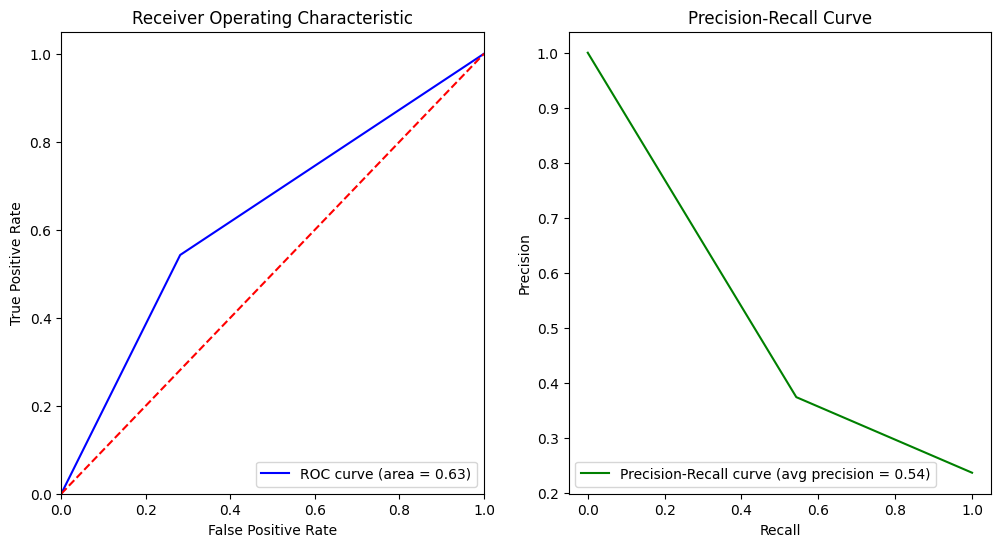

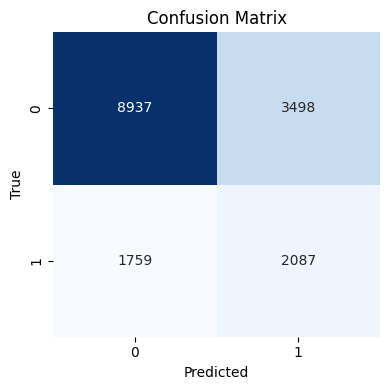

KNN Classifier Results:
Accuracy: 0.68
Precision: 0.37
Recall: 0.54
F1: 0.44
ROC AUC: 0.63
Average Precision: 0.54
Training KNN Classifier with k=2...


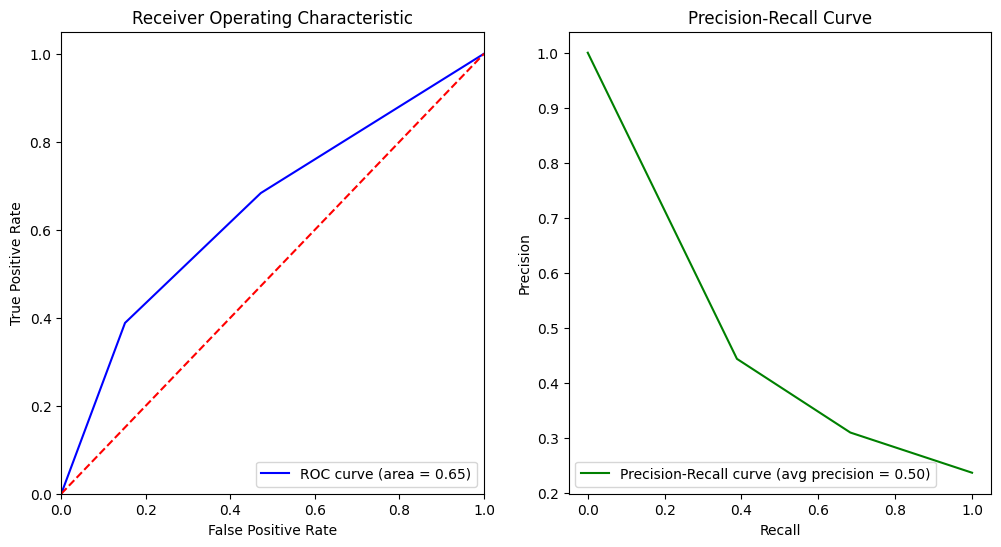

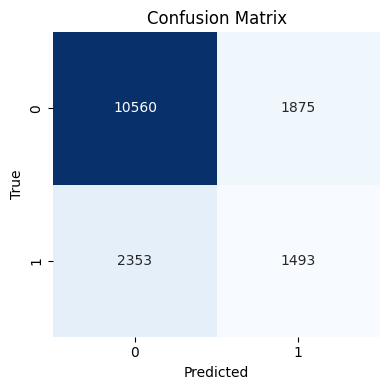

KNN Classifier Results:
Accuracy: 0.74
Precision: 0.44
Recall: 0.39
F1: 0.41
ROC AUC: 0.65
Average Precision: 0.50
Training KNN Classifier with k=3...


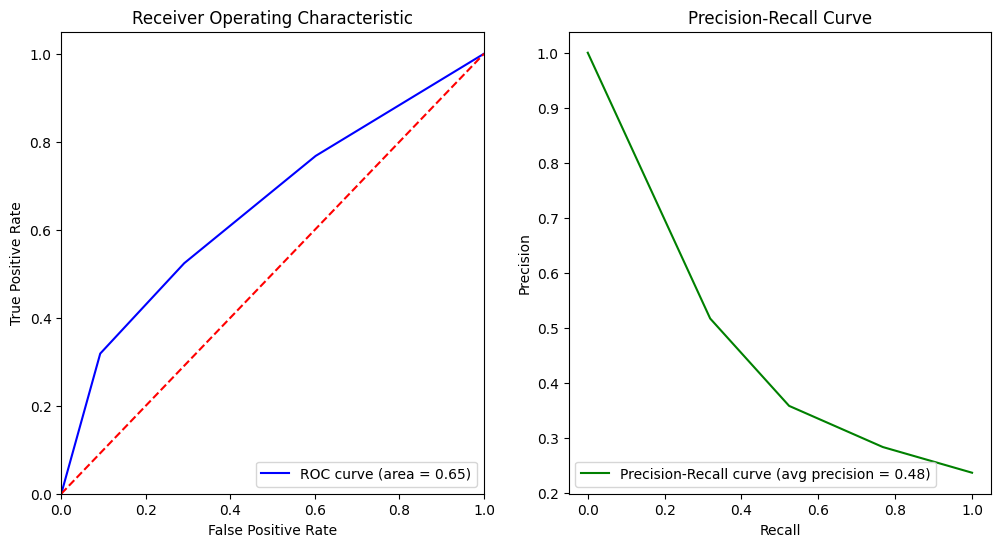

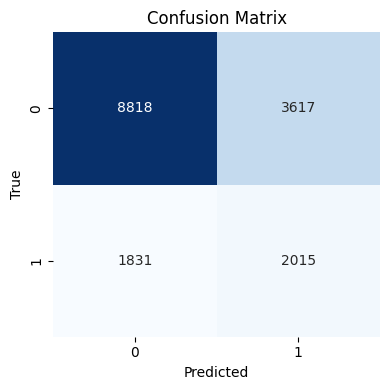

KNN Classifier Results:
Accuracy: 0.67
Precision: 0.36
Recall: 0.52
F1: 0.43
ROC AUC: 0.65
Average Precision: 0.48
Training KNN Classifier with k=4...


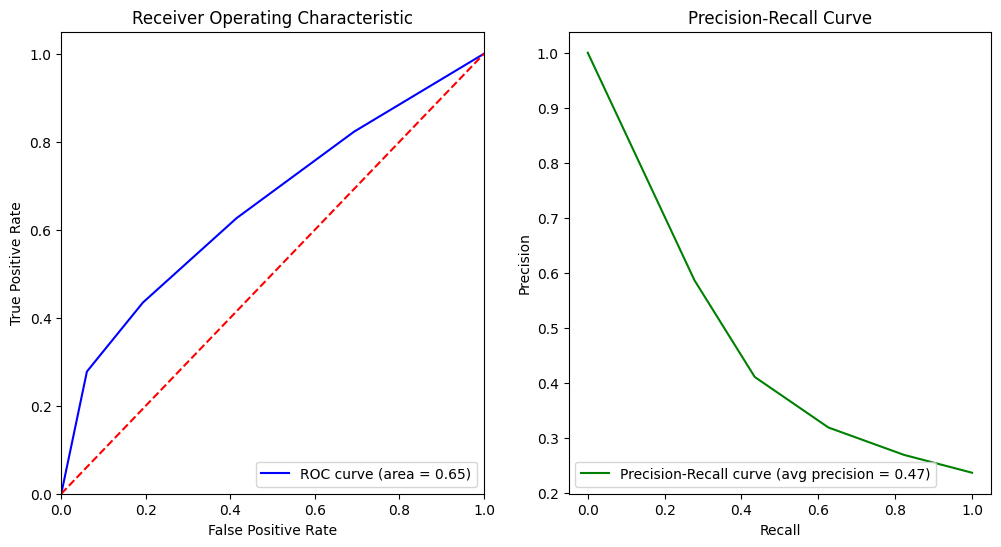

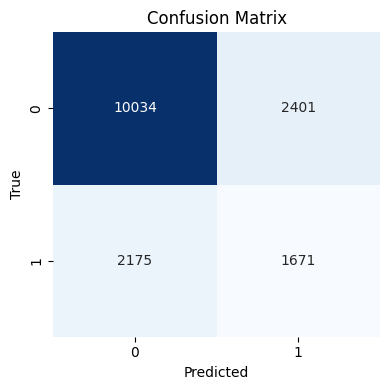

KNN Classifier Results:
Accuracy: 0.72
Precision: 0.41
Recall: 0.43
F1: 0.42
ROC AUC: 0.65
Average Precision: 0.47
Training KNN Classifier with k=5...


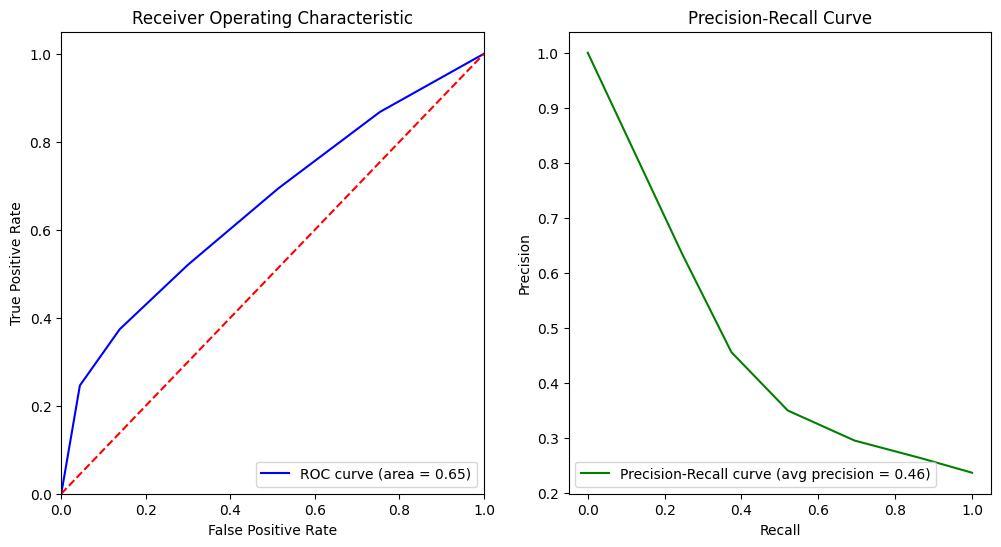

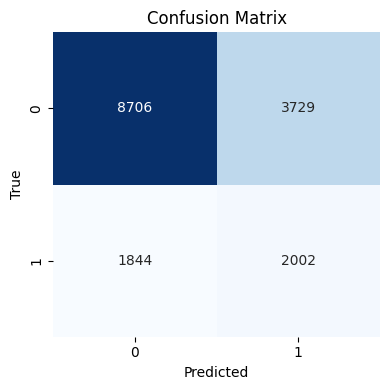

KNN Classifier Results:
Accuracy: 0.66
Precision: 0.35
Recall: 0.52
F1: 0.42
ROC AUC: 0.65
Average Precision: 0.46
Training KNN Classifier with k=6...


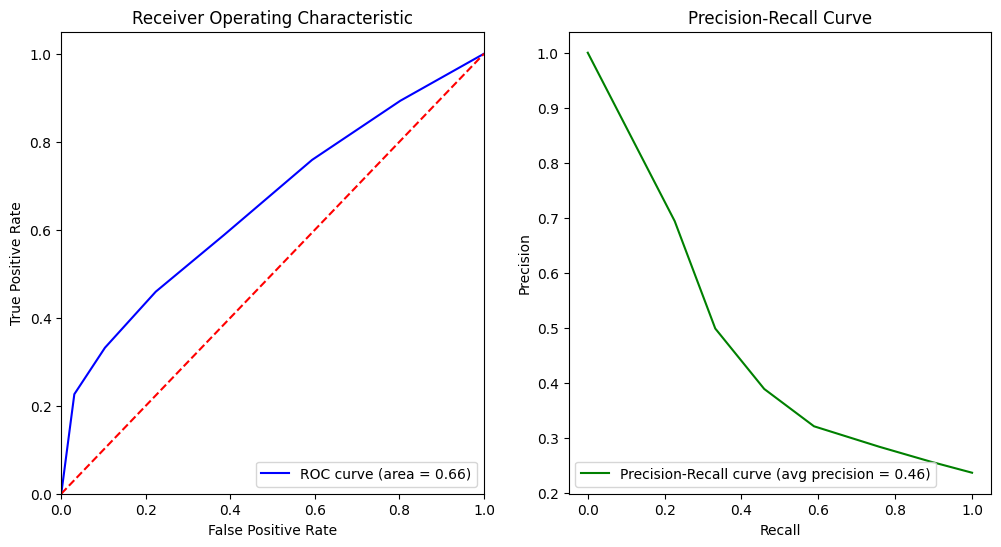

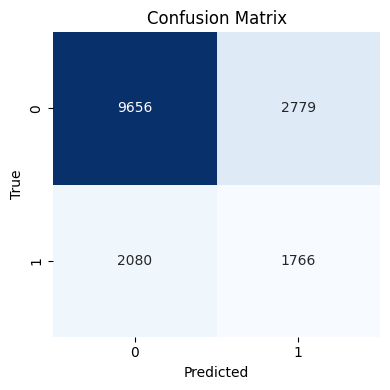

KNN Classifier Results:
Accuracy: 0.70
Precision: 0.39
Recall: 0.46
F1: 0.42
ROC AUC: 0.66
Average Precision: 0.46
Training KNN Classifier with k=7...


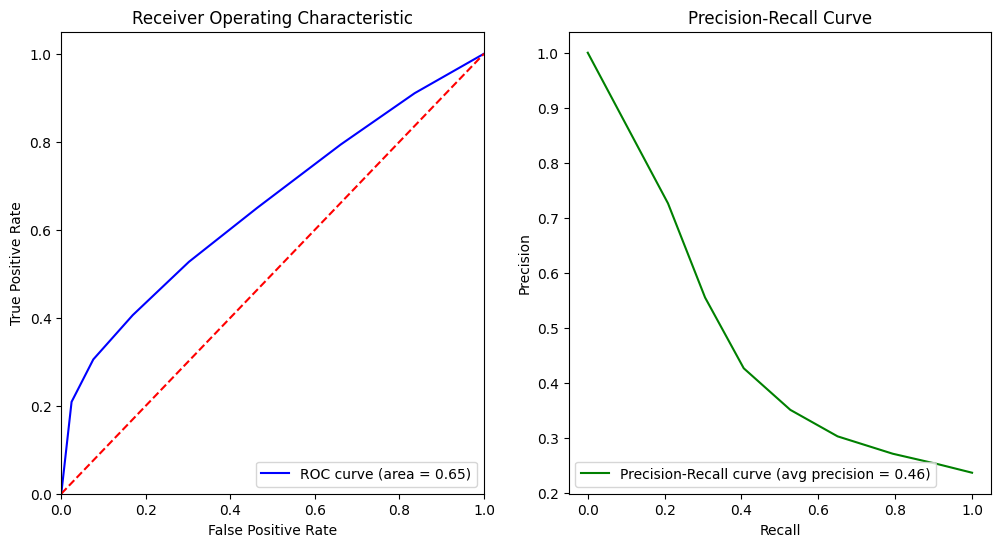

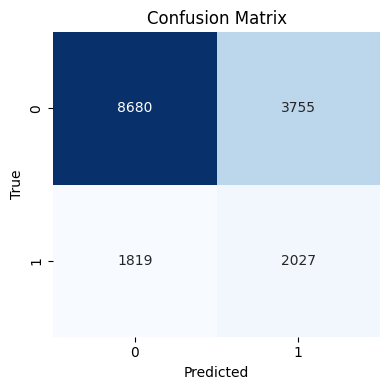

KNN Classifier Results:
Accuracy: 0.66
Precision: 0.35
Recall: 0.53
F1: 0.42
ROC AUC: 0.65
Average Precision: 0.46
Training KNN Classifier with k=8...


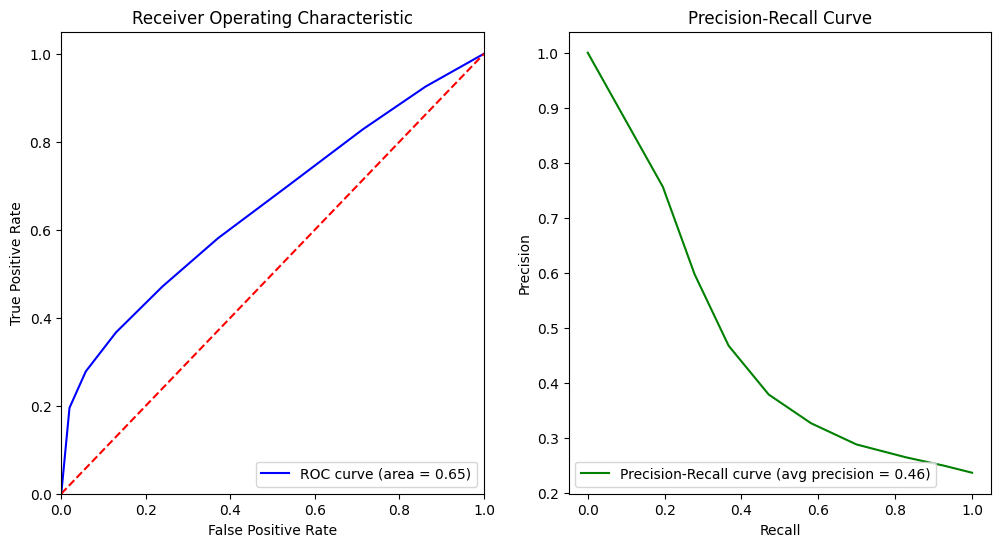

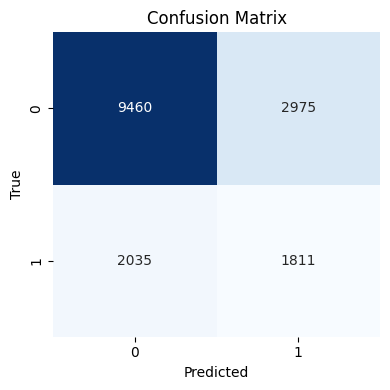

KNN Classifier Results:
Accuracy: 0.69
Precision: 0.38
Recall: 0.47
F1: 0.42
ROC AUC: 0.65
Average Precision: 0.46
Training KNN Classifier with k=9...


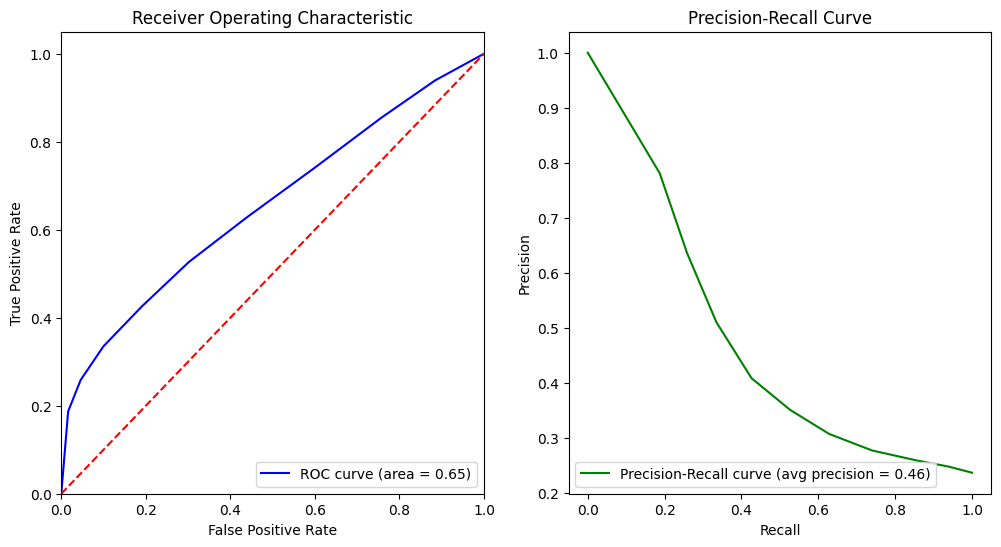

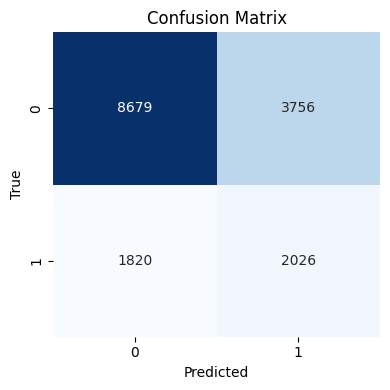

KNN Classifier Results:
Accuracy: 0.66
Precision: 0.35
Recall: 0.53
F1: 0.42
ROC AUC: 0.65
Average Precision: 0.46


In [ ]:
# Implement and train the KNN classifier and evaluate its performance using the function
from sklearn.neighbors import KNeighborsClassifier

for k in range(1, 10):
    print(f"Training KNN Classifier with k={k}...")
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_resampled, y_resampled)

    y_pred = classifier.predict(X_test_encoded)
    y_probs = classifier.predict_proba(X_test_encoded)[:, 1]

    results_knn = evaluate_model(y_test_encoded, y_pred, y_probs)

    print("KNN Classifier Results:")
    for key, value in results_knn.items():
        if key == 'roc_auc':
            print(f"ROC AUC: {value:.2f}")
        elif key == 'precision_recall_curve':
            print(f"Average Precision: {value['avg_precision']:.2f}")
        else:
            print(f"{key.capitalize()}: {value:.2f}")

2. Answer this question:How does  'K' in KNN  affect the model's performance?

<span style="color: yellow;">Answer</span><br>

As the value of k increased from 1 to 10, we observed that the F1 score and average precision gradually decreased and stabilized around 42% and 35%. This behavior reflects the trade-off between model complexity and generalization: as k increases, the model becomes less sensitive to individual data points, reducing overfitting but leading to lower precision and recall values. This trend is expected for KNN, as higher values of k result in smoother decision boundaries, which improves generalization at the cost of slightly decreased performance on individual metrics.

###2)Decision Tree

A decision tree makes predictions by splitting the data into smaller groups based on feature values. At each step (node), it chooses the best condition to separate the data, leading to a tree-like structure where each leaf gives a prediction.

 **Your Task**:
1. Implement and train the Decision Tree classifier on the training dataset.(and then evaluate it on the test dataset)

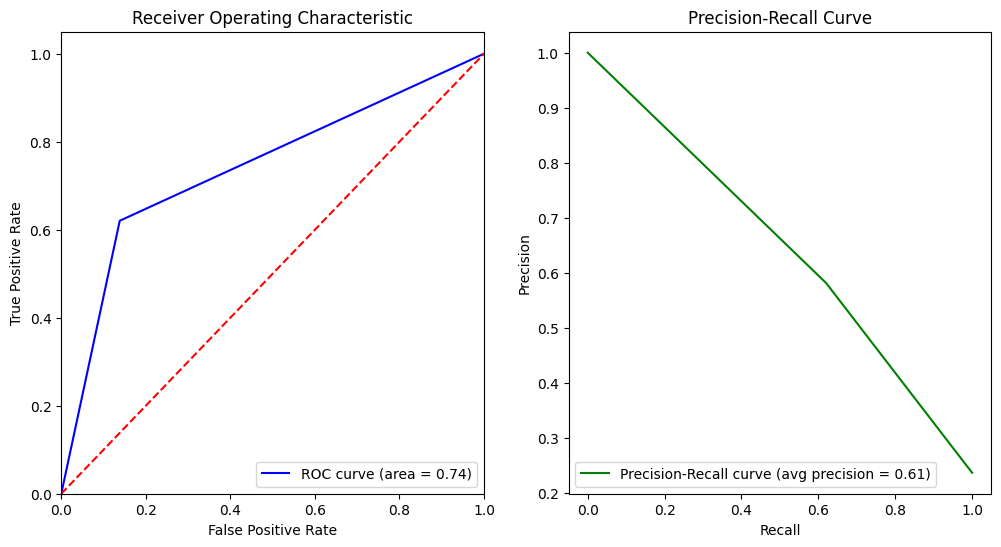

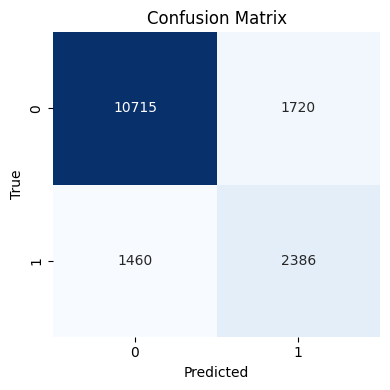

Decision Tree Classifier Results:
Accuracy: 0.80
Precision: 0.58
Recall: 0.62
F1: 0.60
ROC AUC: 0.74
Average Precision: 0.61


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_resampled, y_resampled)

y_pred = dt_classifier.predict(X_test_encoded)
y_probs = dt_classifier.predict_proba(X_test_encoded)[:, 1]

results_dtc = evaluate_model(y_test_encoded, y_pred, y_probs)

# Print results
print("Decision Tree Classifier Results:")
for key, value in results_dtc.items():
    if key == 'roc_auc':
        print(f"ROC AUC: {value:.2f}")
    elif key == 'precision_recall_curve':
        print(f"Average Precision: {value['avg_precision']:.2f}")
    else:
        print(f"{key.capitalize()}: {value:.2f}")

2. Answer this question:How does a decision tree decide where to split the data?

<span style="color: yellow;">Answer</span><br>

A decision tree splits the data at each node based on the feature and threshold that best separates the target classes. To determine the optimal split, the tree evaluates all possible features and thresholds and selects the one that maximizes the "purity" of the resulting subsets. This is typically done using criteria such asentropy (information gain) or mean squared error (for regression tasks).

###3)Random Forest (Ensemble of Decision Trees)

Random Forest is an ensemble method that builds many decision trees on different parts of the data and combines their results. Each tree votes on the prediction, and the majority vote is taken as the final output.

 **Your Task**:
1. Implement and train the Random Forest classifier on the training dataset.(and then evaluate it on the test dataset)

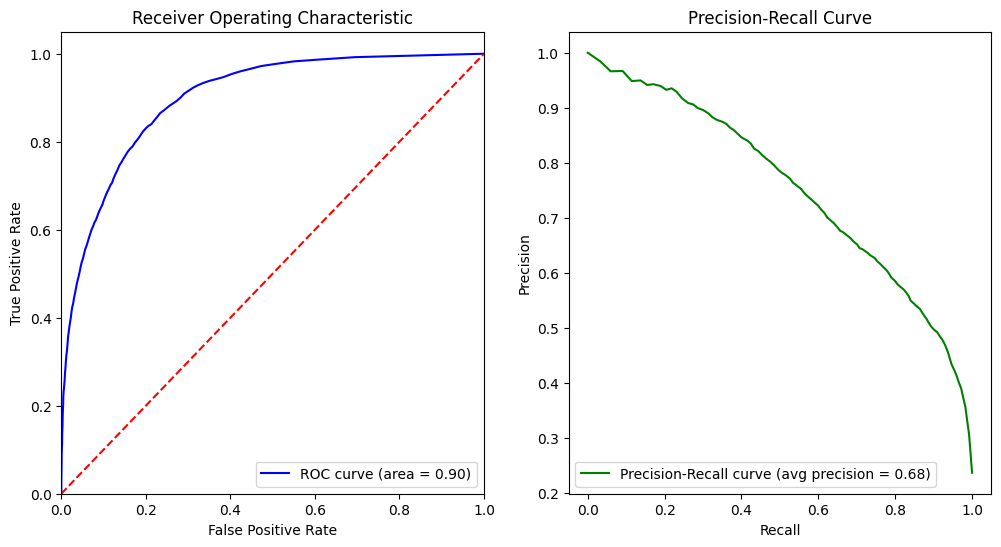

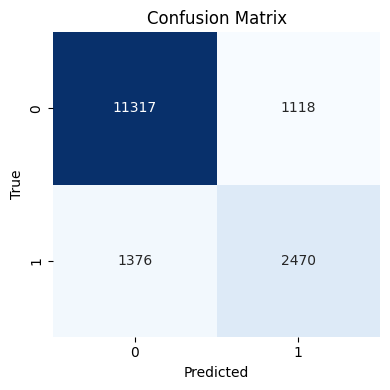

Random Forest Classifier Results:
Accuracy: 0.85
Precision: 0.69
Recall: 0.64
F1: 0.66
ROC AUC: 0.90
Average Precision: 0.68


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_resampled, y_resampled)

y_pred = rf_classifier.predict(X_test_encoded)
y_probs = rf_classifier.predict_proba(X_test_encoded)[:, 1]

results_rfc = evaluate_model(y_test_encoded, y_pred, y_probs)

print("Random Forest Classifier Results:")
for key, value in results_rfc.items():
    if key == 'roc_auc':
        print(f"ROC AUC: {value:.2f}")
    elif key == 'precision_recall_curve':
        print(f"Average Precision: {value['avg_precision']:.2f}")
    else:
        print(f"{key.capitalize()}: {value:.2f}")

2. Answer this question:Why does Random Forest use more than one decision tree?

<span style="color: yellow;">Answer</span><br>

Random Forest is an ensemble learning method that builds and combines the predictions of multiple decision trees to improve accuracy and robustness. A single decision tree is prone to overfitting, especially when the data is noisy or complex. By contrast, Random Forest mitigates this issue by creating an ensemble of trees, each trained on a random subset of the data and using a random subset of features at each split.

The final prediction is made by aggregating the outputs of all trees — for classification, this is typically done through majority voting. This process reduces variance, increases generalization, and leads to more stable and reliable predictions compared to using a single decision tree.

###4)Gradient Boosting Models (XGBoost, LightGBM, CatBoost)

These models build decision trees one at a time, where each new tree focuses on fixing the errors made by the previous ones. This process is called “boosting.” They add up the results of many trees to improve accuracy step-by-step.

###4-1)XGBoost

XGBoost builds decision trees sequentially, where each new tree focuses on correcting the errors of the previous ones. It uses a special technique called “gradient boosting” to minimize the overall loss function efficiently.

 **Your Task**:
1. implement and train the XGBoost classifier on the training dataset.(and then evaluate it on the test dataset)

c:\Users\Younes\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:42:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


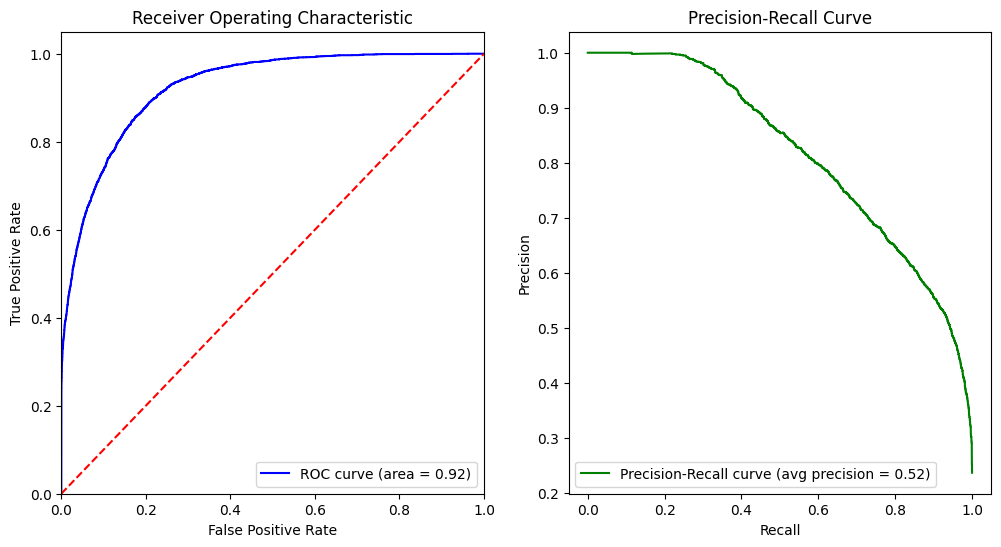

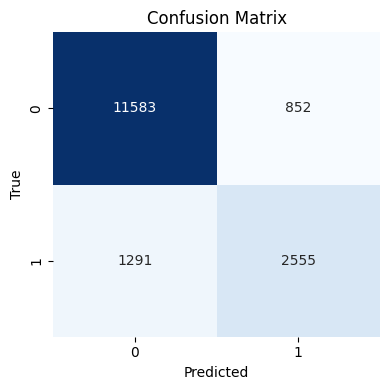

XGBoost Classifier Results:
Accuracy: 0.87
Precision: 0.75
Recall: 0.66
F1: 0.70
ROC AUC: 0.92
Average Precision: 0.52


In [ ]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(
    use_label_encoder=False, eval_metric='logloss', random_state=42
)
xgb_classifier.fit(X_resampled, y_resampled)

y_pred = xgb_classifier.predict(X_test_encoded)
y_probs = xgb_classifier.predict_proba(X_test_encoded)[:, 1]

results_xgb = evaluate_model(y_test_encoded, y_pred, y_probs)

print("XGBoost Classifier Results:")
for key, value in results_xgb.items():
    if key == 'roc_auc':
        print(f"ROC AUC: {value:.2f}")
    elif key == 'precision_recall_curve':
        print(f"Average Precision: {value['avg_precision']:.2f}")
    else:
        print(f"{key.capitalize()}: {value:.2f}")

2. Answer this question:Why does XGBoost build trees in sequence?

<span style="color: yellow;">Answer</span><br>

XGBoost (Extreme Gradient Boosting) builds decision trees sequentially to correct the errors made by previous trees. Unlike Random Forest, where trees are trained independently, XGBoost is based on the boosting technique, where each new tree is added to the model to focus on the mistakes made by the existing ensemble.

At each step, XGBoost calculates the gradients (i.e., how much the current predictions deviate from the true values) and builds a new tree that learns to minimize this error. By combining many such weak learners, XGBoost produces a powerful model that gradually improves performance and achieves high accuracy while controlling overfitting through regularization.

###4-2)LightGBM

LightGBM (Light Gradient Boosting Machine) is a fast, efficient gradient LightGBM is a gradient boosting algorithm that grows trees leaf-wise instead of level-wise, meaning it chooses the leaf with the highest error to grow, which leads to faster and potentially more accurate learning.

 **Your Task**:
1. Implement and train the LightGBM classifier on the training dataset.(and then evaluate it on the test dataset)

[LightGBM] [Info] Number of positive: 24720, number of negative: 24720
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1608
[LightGBM] [Info] Number of data points in the train set: 49440, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


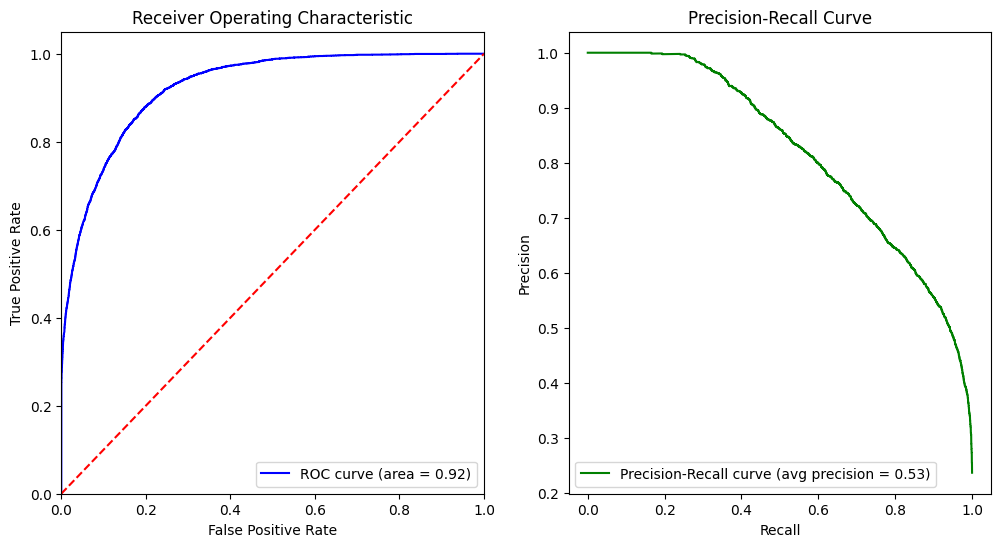

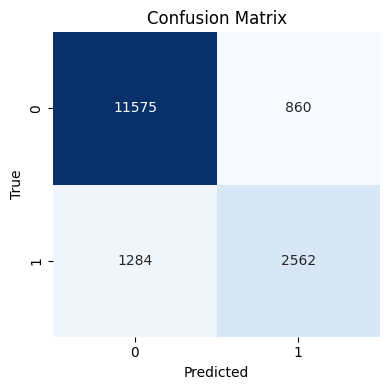

LightGBM Classifier Results:
Accuracy: 0.87
Precision: 0.75
Recall: 0.67
F1: 0.71
ROC AUC: 0.92
Average Precision: 0.53


In [ ]:
from lightgbm import LGBMClassifier

lgbm_classifier = LGBMClassifier(random_state=85)
lgbm_classifier.fit(X_resampled, y_resampled)

y_pred = lgbm_classifier.predict(X_test_encoded)
y_probs = lgbm_classifier.predict_proba(X_test_encoded)[:, 1]

results_lgbm = evaluate_model(y_test_encoded, y_pred, y_probs)

print("LightGBM Classifier Results:")
for key, value in results_lgbm.items():
    if key == 'roc_auc':
        print(f"ROC AUC: {value:.2f}")
    elif key == 'precision_recall_curve':
        print(f"Average Precision: {value['avg_precision']:.2f}")
    else:
        print(f"{key.capitalize()}: {value:.2f}")

2. Answer this question:How does LightGBM grow trees differently?

<span style="color: yellow;">Answer</span><br>

LightGBM (Light Gradient Boosting Machine) differs from traditional gradient boosting algorithms like XGBoost by using a leaf-wise growth strategy instead of the typical level-wise approach. In standard boosting, trees are grown level by level, expanding all nodes at the same depth. In contrast, LightGBM grows the tree by splitting the leaf with the highest loss reduction, allowing it to focus more on the regions of data where the model is performing poorly.

This leaf-wise strategy often leads to deeper, more complex trees, resulting in better accuracy.

###5)Logistic Regression

Logistic Regression is a model that calculates the probability of a data point belonging to a class. It uses a linear combination of input features and passes the result through a function that outputs values between 0 and 1 (called the sigmoid function).

 **Your Task**:
1. Implement and train the Logistic Regression classifier on the training dataset.(and then evaluate it on the test dataset)

c:\Users\Younes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


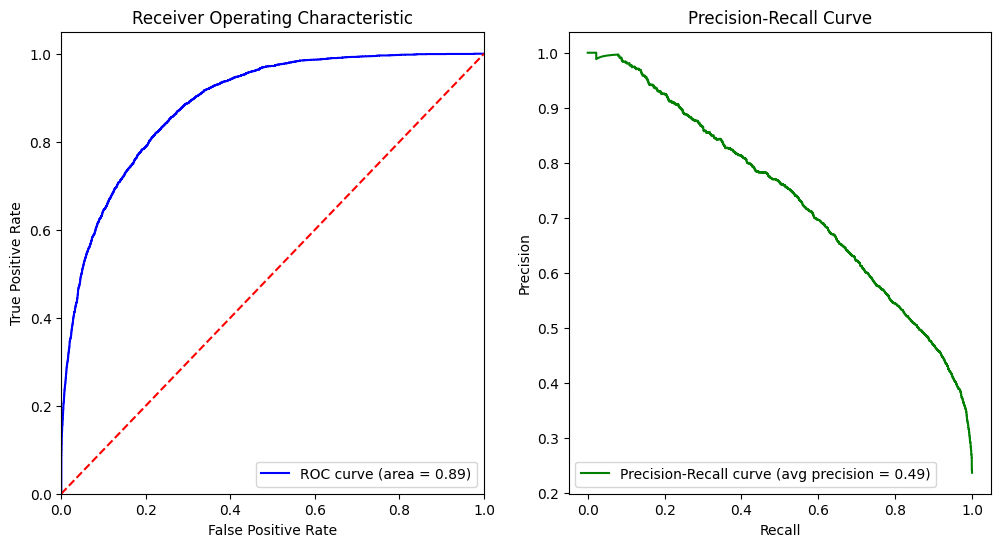

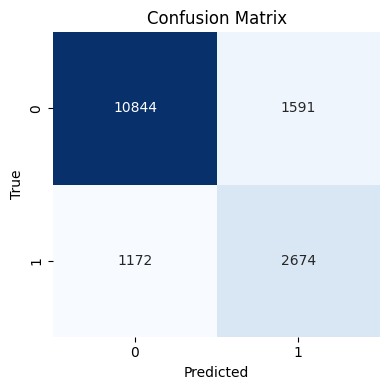

Logistic Regression Classifier Results:
Accuracy: 0.83
Precision: 0.63
Recall: 0.70
F1: 0.66
ROC AUC: 0.89
Average Precision: 0.49


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression(random_state=69, max_iter=1000)
logistic_classifier.fit(X_resampled, y_resampled)

y_pred = logistic_classifier.predict(X_test_encoded)
y_probs = logistic_classifier.predict_proba(X_test_encoded)[:, 1]

results_lgr = evaluate_model(y_test_encoded, y_pred, y_probs)

print("Logistic Regression Classifier Results:")
for key, value in results_lgr.items():
    if key == 'roc_auc':
        print(f"ROC AUC: {value:.2f}")
    elif key == 'precision_recall_curve':
        print(f"Average Precision: {value['avg_precision']:.2f}")
    else:
        print(f"{key.capitalize()}: {value:.2f}")

2. Answer this question:How is the linear formula used in this logistic regression?

<span style="color: yellow;">Answer</span><br>

In logistic regression, the model uses a linear combination of the input features to compute a single score (often called the logit or linear predictor). This score is then passed through the sigmoid function to produce a probability between 0 and 1.

The linear formula looks like this:

$$
z = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n
$$

* $x_1, x_2, \dots, x_n$ are the input features
* $w_1, w_2, \dots, w_n$ are the learned weights (coefficients)
* $w_0$ is the bias (intercept) term
* $z$ is the output of the linear function

This linear score z doesn't directly give the final prediction. Instead, it's passed through the sigmoid function:

$$
P(y = 1 \mid x) = \frac{1}{1 + e^{-z}}
$$

This converts the linear output into a probability that the input belongs to class 1.


###6)SVM with different kernels (e.g., linear, RBF)

SVM finds a line (or a plane in higher dimensions) that best separates the classes in the data. It tries to place this line as far as possible from the nearest points of each class. With different kernels (like linear or RBF), it can also handle non-linear data.

 **Your Task**:
1. Implement and train the SVM classifier on the training dataset.(and then evaluate it on the test dataset)

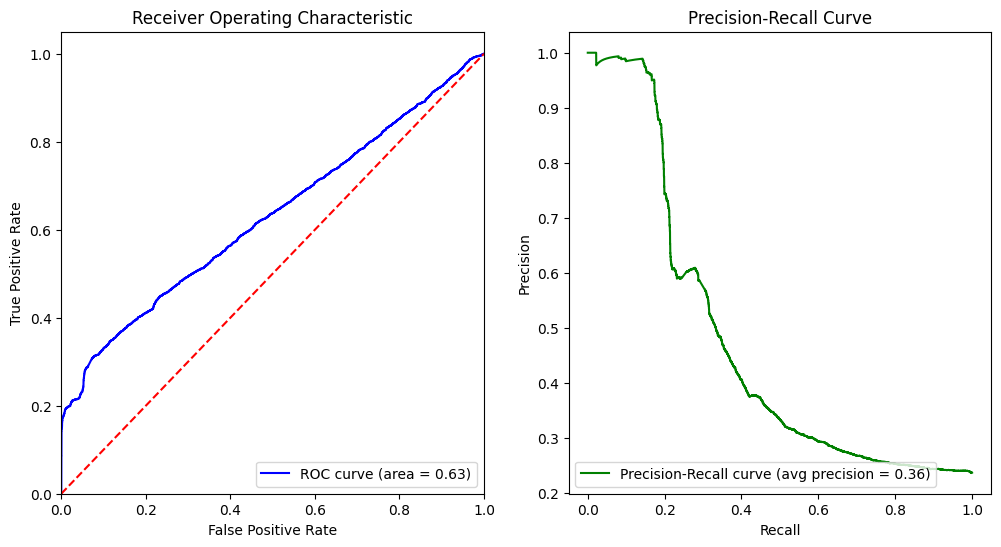

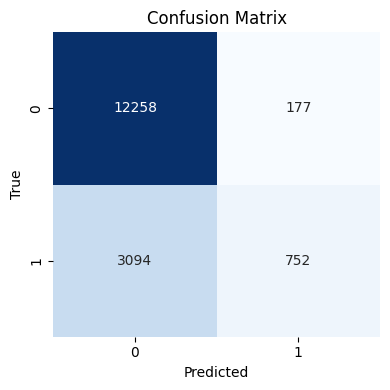

SVM Classifier Results:
Accuracy: 0.80
Precision: 0.81
Recall: 0.20
F1: 0.31
ROC AUC: 0.63
Average Precision: 0.36


In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', probability=True, random_state=69)
svm_classifier.fit(X_resampled, y_resampled)

y_pred = svm_classifier.predict(X_test_encoded)
y_probs = svm_classifier.predict_proba(X_test_encoded)[:, 1]

results_svc = evaluate_model(y_test_encoded, y_pred, y_probs)

print("SVM Classifier Results:")
for key, value in results_svc.items():
    if key == 'roc_auc':
        print(f"ROC AUC: {value:.2f}")
    elif key == 'precision_recall_curve':
        print(f"Average Precision: {value['avg_precision']:.2f}")
    else:
        print(f"{key.capitalize()}: {value:.2f}")

2. Answer this question:How does SVM handle data that can’t be separated by a straight line?

<span style="color: yellow;">Answer</span><br>

Support Vector Machines (SVMs) are designed to find a hyperplane that maximizes the margin between classes. When data is not linearly separable, meaning it cannot be perfectly divided by a straight line (or hyperplane in higher dimensions), SVM still tries to find the best boundary by using two main techniques:<br>
<strong>The Kernel Trick</strong>
The kernel trick is a key feature of SVM that allows it to handle non-linear data. It works by transforming the data into a higher-dimensional space where a linear hyperplane can be used to separate the data.<br>
<strong>Soft Margin SVM (C Parameter)</strong>
When data isn't perfectly separable (i.e., there’s some overlap between classes), SVM allows a soft margin, which means some data points can fall on the wrong side of the margin (misclassified).

###7)Neural Networks (simple MLP for classification)

A Multi-Layer Perceptron (MLP) is a neural network made of layers of connected nodes (neurons). Each neuron takes inputs, applies weights and an activation function, and passes the result to the next layer. It learns by adjusting the weights to reduce prediction error.

 **Your Task**:
1. Implement and train the Neural Networks classifier (simple MLP for classification) on the training dataset.(and then evaluate it on the test dataset)

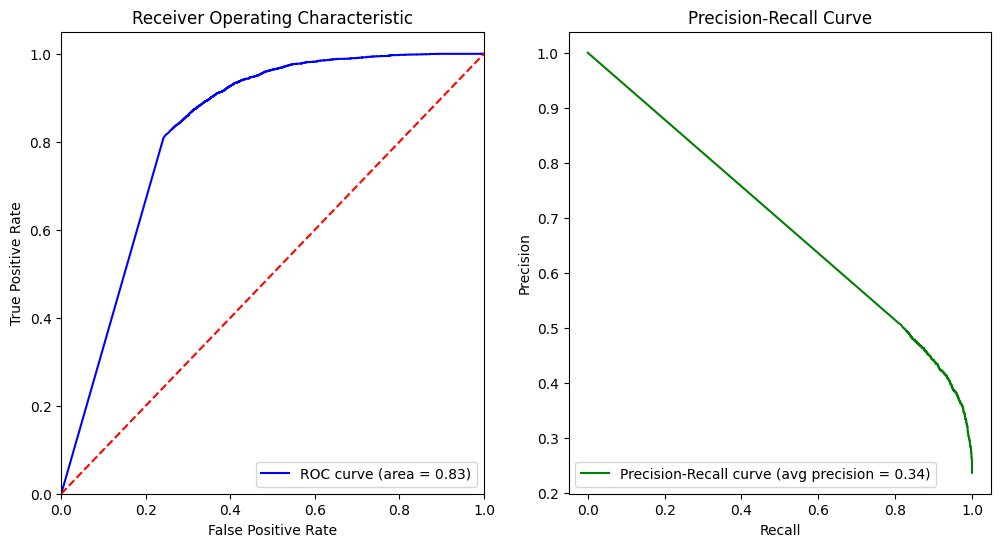

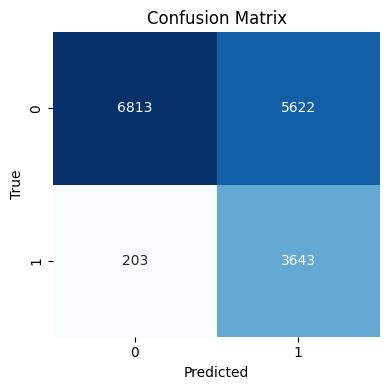

MLP Classifier Results:
Accuracy: 0.64
Precision: 0.39
Recall: 0.95
F1: 0.56
ROC AUC: 0.83
Average Precision: 0.34


In [88]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(100,), activation='relu', max_iter=500, random_state=69
)
mlp_classifier.fit(X_resampled, y_resampled)

y_pred = mlp_classifier.predict(X_test_encoded)
y_probs = mlp_classifier.predict_proba(X_test_encoded)[:, 1]

results = evaluate_model(y_test_encoded, y_pred, y_probs)

# Print results
print("MLP Classifier Results:")
for key, value in results.items():
    if key == 'roc_auc':
        print(f"ROC AUC: {value:.2f}")
    elif key == 'precision_recall_curve':
        print(f"Average Precision: {value['avg_precision']:.2f}")
    else:
        print(f"{key.capitalize()}: {value:.2f}")

2. Answer this question:What happens during the learning process in a neural network?

<span style="color: yellow;">Answer</span><br>

The learning process in a neural network involves training the model to minimize the difference between its predictions and the actual target values.<br>
Input data is passed through the network, layer by layer, where each neuron performs a weighted sum and applies an activation function to produce an output.<br>
The difference between the predicted output and the actual target is calculated using a loss function, such as cross-entropy for classification or mean squared error for regression.<br>
The error is propagated backward through the network to compute gradients, which indicate how much each weight contributed to the error.<br>
Weights and biases are updated using gradient descent to minimize the loss by adjusting them in the direction that reduces the error.<br>
This process is repeated for multiple epochs, gradually improving the model’s performance until convergence, where the loss stabilizes.


# Step 12: Hyperparameter Tuning
Once you have selected the models, you will perform **hyperparameter tuning** to optimize their performance. Hyperparameters are settings that are not learned directly from the data and must be set before training. Examples include the number of neighbors in KNN or the depth of trees in decision tree models.

**Overview:**

You are required to implement the following methods for tuning:

- **Grid Search:** Use Grid Search to search for the best combination of hyperparameters by exhaustively trying all possible combinations in the predefined grid.
- **Randomized Search:** This method performs a randomized search over hyperparameters, sampling from specified distributions. It is more efficient than Grid Search when the search space is large.
- **Bayesian Optimization (optional):** Implement Bayesian optimization using libraries like **Optuna** or **Hyperopt**. This method optimizes hyperparameters by considering prior knowledge of the search space and efficiently explores the most promising configurations.


###1)Grid Search

Grid Search is a method used to find the best combination of hyperparameters by trying out every possible combination from a predefined set of values. For each combination, the model is trained and evaluated, and the one that gives the best result on a validation set is chosen. It helps you systematically explore which settings work best for your model.

**Your Task**:

1.Perform Grid Search on the models.

In [89]:
from sklearn.model_selection import GridSearchCV

param_grids = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7, 9, 11]},
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=69, max_iter=1000),
        'params': {'C': [0.1, 1, 10], 'penalty': ['l2']},
    },
    'XGBoost': {
        'model': XGBClassifier(
            use_label_encoder=False, eval_metric='logloss', random_state=42
        ),
        'params': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    },
    'LightGBM': {
        'model': LGBMClassifier(random_state=85),
        'params': {'n_estimators': [50, 100, 200], 'max_depth': [-1, 10, 20]},
    },
}

best_models = {}
for model_name, config in param_grids.items():
    print(f"Performing Grid Search for {model_name}...")
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring='accuracy',
        cv=3,
        verbose=1,
    )
    grid_search.fit(X_resampled, y_resampled)

    best_models[model_name] = grid_search.best_estimator_

for model_name, best_model in best_models.items():
    print(f"\nBest parameters for {model_name}: {best_model.get_params()}")

Performing Grid Search for KNN...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Performing Grid Search for DecisionTree...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Performing Grid Search for RandomForest...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Performing Grid Search for LogisticRegression...
Fitting 3 folds for each of 3 candidates, totalling 9 fits


c:\Users\Younes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Younes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Performing Grid Search for XGBoost...
Fitting 3 folds for each of 9 candidates, totalling 27 fits


c:\Users\Younes\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:47:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Younes\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:47:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Younes\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:47:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Younes\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:47:36] WARNING: C:\a

Performing Grid Search for LightGBM...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
[LightGBM] [Info] Number of positive: 16480, number of negative: 16480
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1609
[LightGBM] [Info] Number of data points in the train set: 32960, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 16480, number of negative: 16480
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1603
[LightGBM] [Info] Number of data points in the train set: 32960, nu

2. Answer this question:Is Grid Search efficient for large search spaces?

<span style="color: yellow;">Answer</span><br>

Grid Search is not very efficient for large search spaces because it exhaustively searches every possible combination of hyperparameters. While it ensures optimal tuning, it comes at a high computational cost, especially if the parameter grid is large.

###2)Randomized Search

Randomized Search selects random combinations of hyperparameters from specified distributions instead of testing every single one. You choose how many random combinations to try, and the best one is picked based on performance. It's useful when you want to sample from a wide space without checking everything.

**Your Task**:

1.Perform Randomized Search on the models.

In [90]:
from sklearn.model_selection import RandomizedSearchCV

param_grids = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7, 9, 11]},
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=69, max_iter=1000),
        'params': {'C': [0.1, 1, 10], 'penalty': ['l2']},
    },
    'XGBoost': {
        'model': XGBClassifier(
            use_label_encoder=False, eval_metric='logloss', random_state=42
        ),
        'params': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    },
    'LightGBM': {
        'model': LGBMClassifier(random_state=85),
        'params': {'n_estimators': [50, 100, 200], 'max_depth': [-1, 10, 20]},
    },
}
best_models = {}
for model_name, config in param_grids.items():
    print(f"Performing Randomized Search for {model_name}...")

    # Randomized Search with limited iterations
    random_search = RandomizedSearchCV(
        estimator=config['model'],
        param_distributions=config['params'],
        scoring='accuracy',
        cv=3,
        n_iter=5,  # Number of random samples to evaluate
        verbose=1,
        random_state=69,
    )

    random_search.fit(X_resampled, y_resampled)

    best_models[model_name] = random_search.best_estimator_

for model_name, best_model in best_models.items():
    print(f"\nBest parameters for {model_name}: {best_model.get_params()}")

Performing Randomized Search for KNN...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Performing Randomized Search for DecisionTree...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Performing Randomized Search for RandomForest...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Performing Randomized Search for LogisticRegression...
Fitting 3 folds for each of 3 candidates, totalling 9 fits


c:\Users\Younes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Younes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Younes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF

Performing Randomized Search for XGBoost...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\Users\Younes\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:50:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Younes\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:50:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Younes\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:50:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Younes\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:50:04] WARNING: C:\a

Performing Randomized Search for LightGBM...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[LightGBM] [Info] Number of positive: 16480, number of negative: 16480
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1609
[LightGBM] [Info] Number of data points in the train set: 32960, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 16480, number of negative: 16480
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1603
[LightGBM] [Info] Number of data points in the train set: 329

2. Answer this question:What’s the main difference from Grid Search?

<span style="color: yellow;">Answer</span><br>

Grid Search: Exhaustive, checks all possible combinations, and can be very slow if the search space is large.<br>

Random Search: Faster, checks random combinations, and can be more efficient at finding good hyperparameters, especially for large or continuous hyperparameter spaces.<br>

In practice, Random Search is often preferred for large or complex hyperparameter spaces because it tends to find good hyperparameters faster than Grid Search without needing to check every possible combination.

###3)Bayesian Optimization (optional, e.g., with libraries like Optuna or Hyperopt)

Bayesian Optimization is a smarter way of tuning hyperparameters. It builds a model of the performance (objective function) based on past results and decides which hyperparameters to try next by predicting which ones might work better. Libraries like Optuna or Hyperopt help automate this process.

In [65]:
# TODO

2. Answer this question:What makes Bayesian Optimization smart?

<span style="color: yellow;">Answer</span><br>

# Step 13:Evaluation
This part of the project focuses on assessing the performance of the trained models. It involves comparing the model's predictions with the actual outcomes from the test dataset. This step helps determine how well each model generalizes to unseen data.

**Your Task**:

1.Answer this question: What are the formulas for Accuracy, Precision, Recall, F1-score?

<span style="color: yellow;">Answer</span><br>

### **Confusion Matrix Terms**:

* **TP** = True Positives (correctly predicted positives)
* **TN** = True Negatives (correctly predicted negatives)
* **FP** = False Positives (incorrectly predicted as positive)
* **FN** = False Negatives (missed positive cases)

### **1. Accuracy**

Measures the overall correctness of the model.

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

### **2. Precision**

Measures how many of the predicted positives are actually correct.

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

### **3. Recall (Sensitivity or True Positive Rate)**

Measures how many of the actual positives were correctly identified.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

### **4. F1 Score**

Harmonic mean of precision and recall. It balances the two, especially useful when classes are imbalanced.

$$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$


2.Answer this question: What are the ROC Curve & AUC curve?

<span style="color: yellow;">Answer</span><br>


**ROC Curve**:

The Receiver Operating Characteristic (ROC) curve visualizes a classifier's performance at various thresholds.
True Positive Rate (TPR) vs. False Positive Rate (FPR)**:
  * TPR (Sensitivity): Proportion of actual positives correctly identified.
  * FPR: Proportion of actual negatives incorrectly classified as positives.

AUC (Area Under the Curve):

* AUC quantifies the overall performance of the classifier.

  * **AUC = 1**: Perfect model.
  * **AUC = 0.5**: No better than random guessing.
  * **AUC > 0.7**: Good model performance.


* **ROC Curve**: The closer the curve is to the top-left corner, the better the model's performance.
* **AUC**: A value closer to 1 indicates a better ability to distinguish between classes.

3.Answer this question: What is a Confusion Matrix?

<span style="color: yellow;">Answer</span><br>

What is a Confusion Matrix?
A confusion matrix is a table used to evaluate the performance of a classification model. It summarizes the results of predictions made by the model compared to the actual outcomes. The matrix consists of four components:
- True Positives (TP): The number of instances correctly predicted as positive.
- True Negatives (TN): The number of instances correctly predicted as negative.
- False Positives (FP): The number of instances incorrectly predicted as positive (Type I error).
- False Negatives (FN): The number of instances incorrectly predicted as negative (Type II error).\


The confusion matrix provides a comprehensive view of the model's performance, allowing for the calculation of various metrics such as accuracy, precision, recall, and F1-score. It helps identify specific areas where the model may be making errors, enabling targeted improvements.

# Step 14: Cross-Validation (Optional)
To ensure the models generalize well to unseen data, you will use **cross-validation**. This technique splits the dataset into multiple subsets (folds), and each model is trained on different combinations of training and validation sets. This will give you a more robust estimate of the model's performance.

**"Note: You should implement cross-validation for only one model."**

In [66]:
# TODO

# Step 15: Model Comparison
After evaluating all the models, you will compare them based on their performance metrics. The goal is to select the best model that performs well across multiple metrics and generalizes effectively to unseen data.

(Optional) you should apply **statistical tests** (such as **McNemar’s test**) to assess whether differences between model performances are statistically significant. This will help ensure the selection of the optimal model is based on solid evidence.

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame to hold results for easy comparison
comparison_df = pd.DataFrame(
    {
        'Model': [
            'Decision Tree',
            'Random Forest',
            'XGBoost',
            'LightGBM',
            'Logistic Regression',
            'SVM',
            'KNN',
        ],
        'Accuracy': [
            results_dtc['accuracy'],
            results_rfc['accuracy'],
            results_xgb['accuracy'],
            results_lgbm['accuracy'],
            results_lgr['accuracy'],
            results_svc['accuracy'],
            results_knn['accuracy'],
        ],
        'Precision': [
            results_dtc['precision'],
            results_rfc['precision'],
            results_xgb['precision'],
            results_lgbm['precision'],
            results_lgr['precision'],
            results_svc['precision'],
            results_knn['precision'],
        ],
        'Recall': [
            results_dtc['recall'],
            results_rfc['recall'],
            results_xgb['recall'],
            results_lgbm['recall'],
            results_lgr['recall'],
            results_svc['recall'],
            results_knn['recall'],
        ],
        'F1 Score': [
            results_dtc['f1'],
            results_rfc['f1'],
            results_xgb['f1'],
            results_lgbm['f1'],
            results_lgr['f1'],
            results_svc['f1'],
            results_knn['f1'],
        ],
        'ROC AUC': [
            results_dtc['roc_auc'],
            results_rfc['roc_auc'],
            results_xgb['roc_auc'],
            results_lgbm['roc_auc'],
            results_lgr['roc_auc'],
            results_svc['roc_auc'],
            results_knn['roc_auc'],
        ],
        'Avg Precision': [
            results_dtc['precision_recall_curve']['avg_precision'],
            results_rfc['precision_recall_curve']['avg_precision'],
            results_xgb['precision_recall_curve']['avg_precision'],
            results_lgbm['precision_recall_curve']['avg_precision'],
            results_lgr['precision_recall_curve']['avg_precision'],
            results_svc['precision_recall_curve']['avg_precision'],
            results_knn['precision_recall_curve']['avg_precision'],
        ],
    }
)

# Display the comparison table
comparison_df.sort_values(
    by='ROC AUC', ascending=False, inplace=True
)  # Sort by ROC AUC for better comparison
comparison_df.set_index('Model', inplace=True)
comparison_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Avg Precision
Model,,,,,,
XGBoost,0.868374,0.749927,0.664327,0.704536,0.924050,0.522502
LightGBM,0.868313,0.748685,0.666147,0.705008,0.924043,0.525596
Random Forest,0.846815,0.688406,0.642226,0.664514,0.899074,0.684817
Logistic Regression,0.830293,0.626964,0.695268,0.659351,0.887885,0.494086
Decision Tree,0.804680,0.581101,0.620385,0.600101,0.741033,0.605776
KNN,0.657515,0.350398,0.526781,0.420856,0.652661,0.455486
SVM,0.799091,0.809473,0.195528,0.314974,0.629235,0.361405


## Step 17: Conclusion
At the end of this step, you will identify the best-performing model based on the evaluation metrics. You should then decide if further improvements (e.g., feature engineering, model ensembling) are necessary to achieve better results.

After evaluating multiple machine learning models using accuracy, F1-score, and ROC AUC metrics, XGBoost emerged as the best-performing model. This conclusion is based on the following key observations:

Highest Accuracy (0.86) – Indicates the overall correctness of predictions.

Second Highest F1 Score (0.70) – Demonstrates a strong balance between precision and recall.

Highest ROC AUC (0.92) – Shows that the model is effective at distinguishing between classes.

While SVM has the highest precision (0.81), its recall is significantly lower (0.19), meaning it fails to detect a large portion of positive instances. This makes XGBoost the most suitable model for deployment.